#### Data Overview

| Column Name           | Explanation                                                                                      |
|-----------------------|--------------------------------------------------------------------------------------------------|
| Booking_ID            | A unique identifier for each booking.                                                            |
| Number of adults      | The count of adult guests in the booking.                                                        |
| Number of children    | The count of child guests in the booking.                                                        |
| Number of weekend nights | The number of nights during the weekend (typically Friday and Saturday nights).                   |
| Number of week nights | The number of nights during weekdays (Sunday through Thursday nights).                            |
| Type of meal          | The meal plan included in the booking .         |
| Car parking space     | Whether the booking includes a parking space for a car.                                           |
| Room type             | The type of room booked .                                            |
| Lead time             | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date        |
| Market segment type   | The market segment the booking belongs to                       |
| Repeated              | Indicates whether the booking is a repeat booking .            |
| P-C                   | Probability of Cancelation - The likelihood that the booking will be canceled.                   |
| P-not-C               | Probability of Not Cancelation - The likelihood that the booking will not be canceled.           |
| Average price         | The average price per night for the booking.                                                      |
| Special requests      | Any additional requests or requirements made by the guest.                                         |
| Date of reservation   | The date when the booking was made.                                                               |
| Booking status        | The current status of the booking (e.g., confirmed, canceled, pending).                           |


# **Importing Libraries**

In [1]:

import pandas as pd
import numpy as np
from scipy.stats import uniform, loguniform

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.rcParams['figure.figsize']=(12,6)
%matplotlib inline
from sklearn.model_selection import learning_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB ,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.feature_selection import SelectFromModel

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import statsmodels.api as sm

import datetime as dt

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Importing The  Data

In [2]:
df=pd.read_csv('first inten project.csv')
df.head()

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price   \
0        224             Offline         0    0        0           88.00   
1          5              Online         0    0        0          106.68   
2          1              Online         0    0        0           50.00   
3        211              Online         0    0        0          100.00   
4         48              Online         0    0        0           77.00   

   special requests date of reservation booking status  
0                 0           10/2/2015   Not_Canceled  
1                 1           11/6/2018   Not_Canceled  
2                 0           2/28/2018       Canceled  
3                 1           5/20/2017       Canceled  
4                 0           4/11/2018       Canceled

### EDA

In [3]:
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [4]:
df.rename(columns={'average price ': 'average price'}, inplace=True)

In [5]:
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [7]:
df.describe()

number of adults  number of children  number of weekend nights  \
count      36285.000000        36285.000000              36285.000000   
mean           1.844839            0.105360                  0.810693   
std            0.518813            0.402704                  0.870590   
min            0.000000            0.000000                  0.000000   
25%            2.000000            0.000000                  0.000000   
50%            2.000000            0.000000                  1.000000   
75%            2.000000            0.000000                  2.000000   
max            4.000000           10.000000                  7.000000   

       number of week nights  car parking space     lead time      repeated  \
count           36285.000000       36285.000000  36285.000000  36285.000000   
mean                2.204602           0.030977     85.239851      0.025630   
std                 1.410946           0.173258     85.938796      0.158032   
min                 0.000000           0.000000      0.000000      0.000000   
25%                 1.000000           0.000000     17.000000      0.000000   
50%                 2.000000           0.000000     57.000000      0.000000   
75%                 3.000000           0.000000    126.000000      0.000000   
max                17.000000           1.000000    443.000000      1.000000   

                P-C       P-not-C  average price  special requests  
count  36285.000000  36285.000000   36285.000000      36285.000000  
mean       0.023343      0.153369     103.421636          0.619733  
std        0.368281      1.753931      35.086469          0.786262  
min        0.000000      0.000000       0.000000          0.000000  
25%        0.000000      0.000000      80.300000          0.000000  
50%        0.000000      0.000000      99.450000          0.000000  
75%        0.000000      0.000000     120.000000          1.000000  
max       13.000000     58.000000     540.000000          5.000000

In [8]:
df['type of meal'].value_counts()

Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: type of meal, dtype: int64

In [9]:
df['room type'].value_counts()

Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room type, dtype: int64

In [10]:
df['market segment type'].value_counts()

Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: market segment type, dtype: int64

In [11]:
df['booking status'].value_counts()

Not_Canceled    24396
Canceled        11889
Name: booking status, dtype: int64

#### Check The Missing Data

In [12]:
df.shape

(36285, 17)

In [13]:
df.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [14]:
# Another way
[features for features in df.columns if df[features].isnull().sum() >0]

[]

###### No Misssing  Value

<Axes: >

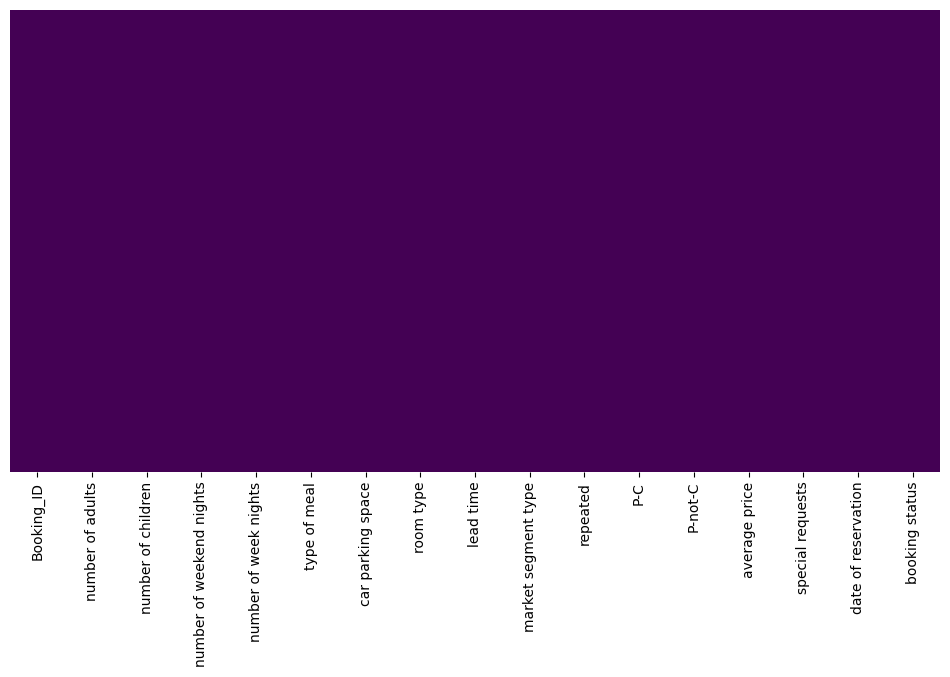

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
df.drop(columns=['Booking_ID'],axis=1,inplace=True)

In [17]:
# We Change it to dataframe
My_group_by=df.groupby(['number of adults','number of children','number of weekend nights','number of week nights','room type','booking status']).size().reset_index().rename(columns={0:'Count'})

In [18]:
My_group_by.head()

number of adults  number of children  number of weekend nights  \
0                 0                   1                         2   
1                 0                   2                         0   
2                 0                   2                         0   
3                 0                   2                         0   
4                 0                   2                         0   

   number of week nights    room type booking status  Count  
0                      4  Room_Type 2   Not_Canceled      1  
1                      1  Room_Type 1   Not_Canceled      1  
2                      1  Room_Type 2       Canceled      3  
3                      1  Room_Type 2   Not_Canceled     13  
4                      1  Room_Type 6   Not_Canceled      1

### Extract Number Of The Family

In [19]:
df['Total_Family_Number']=df['number of adults']+df['number of children']
df.head()

number of adults  number of children  number of weekend nights  \
0                 1                   1                         2   
1                 1                   0                         1   
2                 2                   1                         1   
3                 1                   0                         0   
4                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price  \
0        224             Offline         0    0        0          88.00   
1          5              Online         0    0        0         106.68   
2          1              Online         0    0        0          50.00   
3        211              Online         0    0        0         100.00   
4         48              Online         0    0        0          77.00   

   special requests date of reservation booking status  Total_Family_Number  
0                 0           10/2/2015   Not_Canceled                    2  
1                 1           11/6/2018   Not_Canceled                    1  
2                 0           2/28/2018       Canceled                    3  
3                 1           5/20/2017       Canceled                    1  
4                 0           4/11/2018       Canceled                    1

In [20]:
df['Total_Family_Number'] = df['Total_Family_Number'].astype(int)

In [21]:
df.drop(columns=['number of adults','number of children'],axis=1,inplace=True)

### Date Preprocessing

In [22]:
df["date of reservation"] = pd.to_datetime(df["date of reservation"], errors='coerce')
df["date of reservation"] = pd.to_datetime(df["date of reservation"].fillna("02/2/2018").dt.strftime("%m/%d/%Y"))

In [23]:
df['Month'] = df['date of reservation'].dt.month.astype('Int64')
df['Year'] = df['date of reservation'].dt.year.astype('Int64')
df['Day_of_week'] = df['date of reservation'].dt.dayofweek

In [24]:
len(df[df['date of reservation']=='2018-2-29'])

0

In [25]:
df.isnull().sum()

number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
Total_Family_Number         0
Month                       0
Year                        0
Day_of_week                 0
dtype: int64

In [26]:
df.head()

number of weekend nights  number of week nights  type of meal  \
0                         2                      5   Meal Plan 1   
1                         1                      3  Not Selected   
2                         1                      3   Meal Plan 1   
3                         0                      2   Meal Plan 1   
4                         1                      2  Not Selected   

   car parking space    room type  lead time market segment type  repeated  \
0                  0  Room_Type 1        224             Offline         0   
1                  0  Room_Type 1          5              Online         0   
2                  0  Room_Type 1          1              Online         0   
3                  0  Room_Type 1        211              Online         0   
4                  0  Room_Type 1         48              Online         0   

   P-C  P-not-C  average price  special requests date of reservation  \
0    0        0          88.00                 0          2015-10-02   
1    0        0         106.68                 1          2018-11-06   
2    0        0          50.00                 0          2018-02-28   
3    0        0         100.00                 1          2017-05-20   
4    0        0          77.00                 0          2018-04-11   

  booking status  Total_Family_Number  Month  Year  Day_of_week  
0   Not_Canceled                    2     10  2015            4  
1   Not_Canceled                    1     11  2018            1  
2       Canceled                    3      2  2018            2  
3       Canceled                    1      5  2017            5  
4       Canceled                    1      4  2018            2

In [27]:
df.drop(columns=['date of reservation'],axis=1,inplace=True)

## Data Visualization

In [28]:
overall_cancellation_rate = df['booking status'].value_counts(normalize=True).get('Canceled', 0)
cancellation_by_segment = df.groupby('market segment type')['booking status'].value_counts(normalize=True).unstack().get('Canceled', 0)

In [29]:
monthly_cancellations = df.groupby('Month')['booking status'].value_counts(normalize=True).unstack().get('Canceled', 0)

#### Price Analysis

In [30]:
df['Days of reservation']=(df['number of weekend nights'] + df['number of week nights'])

In [31]:
df.drop(columns=['number of weekend nights','number of week nights'],axis=1,inplace=True)

In [32]:
df.head()

type of meal  car parking space    room type  lead time  \
0   Meal Plan 1                  0  Room_Type 1        224   
1  Not Selected                  0  Room_Type 1          5   
2   Meal Plan 1                  0  Room_Type 1          1   
3   Meal Plan 1                  0  Room_Type 1        211   
4  Not Selected                  0  Room_Type 1         48   

  market segment type  repeated  P-C  P-not-C  average price  \
0             Offline         0    0        0          88.00   
1              Online         0    0        0         106.68   
2              Online         0    0        0          50.00   
3              Online         0    0        0         100.00   
4              Online         0    0        0          77.00   

   special requests booking status  Total_Family_Number  Month  Year  \
0                 0   Not_Canceled                    2     10  2015   
1                 1   Not_Canceled                    1     11  2018   
2                 0       Canceled                    3      2  2018   
3                 1       Canceled                    1      5  2017   
4                 0       Canceled                    1      4  2018   

   Day_of_week  Days of reservation  
0            4                    7  
1            1                    4  
2            2                    4  
3            5                    2  
4            2                    3

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['average price'], kde=True)
plt.title('Distribution of Average Price')
plt.xlabel('Average Price ')
plt.ylabel('Frequency')
plt.show()

In [34]:
overall_mean = np.mean(df['average price'])
print("Mean of the price distribution:", overall_mean)

Mean of the price distribution: 103.4216359377153


### Observation :
* **1)** Its a right Distribution with mean price 103.4 over all its a good price  
* **2)** the data is semi normal means of there is an outlier

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='booking status', y='average price', data=df)
plt.title('Average Price  vs Cancellation Status')
plt.xlabel('Cancellation Status')
plt.ylabel('Average Price')
plt.show()


* **1)** here we see the outliers of the prices based on the booking status  
* **2)** we see that the canceled outliers is heigher than the not_cancele  

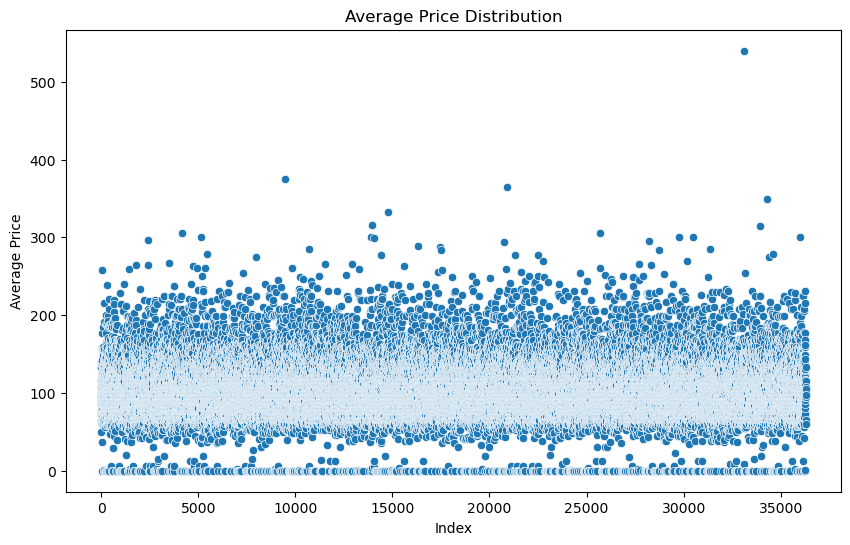

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y='average price', data=df)
plt.title('Average Price Distribution')
plt.xlabel('Index')
plt.ylabel('Average Price')
plt.show()

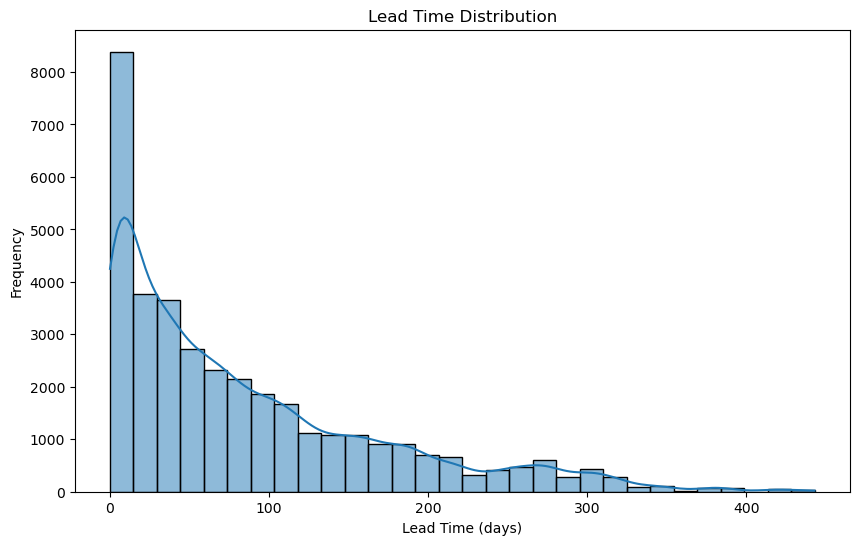

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['lead time'], bins=30, kde=True)
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

In [38]:
mean_lead_time = df['lead time'].mean()
mean_lead_time

85.2398511781728


* **1)** The Distribution of the lead time is also skewed means there is an outlier   
* **2)** the mean lead time is : 85.2
* **3)** we see that there is people comes after a long time from the booking day

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['booking status'] == 'Canceled']['lead time'], bins=30, kde=True, label='Canceled')
sns.histplot(df[df['booking status'] == 'Not_Canceled']['lead time'], bins=30, kde=True, label='Not Canceled')
plt.title('Impact of Lead Time on Cancellation Rates')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.legend(title='Booking Status')
plt.show()

### Observation :
* **1)** we see that the lead time for the cancelation is lower than the not_cancelation means overall its a good sign .
* **2)** its also a right skewed  

booking status
Canceled        139.219615
Not_Canceled     58.933678
Name: lead time, dtype: float64


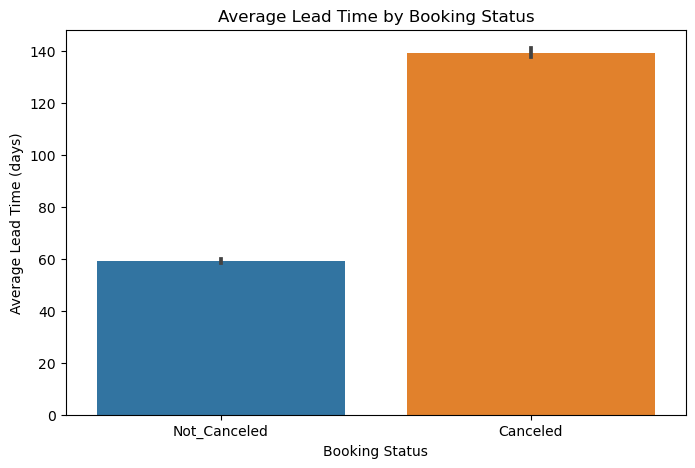

In [40]:
lead_time_cancel_corr = df.groupby('booking status')['lead time'].mean()
print(lead_time_cancel_corr)


plt.figure(figsize=(8, 5))
sns.barplot(x='booking status', y='lead time', data=df)
plt.title('Average Lead Time by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Average Lead Time (days)')
plt.show()

### Observation :
* **1)** we see AVG lead time for both cancel and not_cancel
* **2)** Avg canceled is heigher than the not_cancel : indicate for late coming thats maybe the causation of cancelling

# ========================================

#### Market Segment Analysis

In [41]:
booking_patterns = df.groupby('market segment type').size()
print("Booking Patterns Across Different Market Segments:")
print(booking_patterns)

Booking Patterns Across Different Market Segments:
market segment type
Aviation           125
Complementary      391
Corporate         2017
Offline          10531
Online           23221
dtype: int64


In [42]:
cancellation_rates = df.groupby('market segment type')['booking status'].apply(lambda x: (x == 'Canceled').mean())
print("\nCancellation Rates Among Different Market Segments:")
print(cancellation_rates)


Cancellation Rates Among Different Market Segments:
market segment type
Aviation         0.296000
Complementary    0.000000
Corporate        0.109073
Offline          0.299497
Online           0.365101
Name: booking status, dtype: float64


In [43]:
average_prices = df.groupby('market segment type')['average price'].mean()
print("\nAverage Prices Among Different Market Segments:")
print(average_prices)


Average Prices Among Different Market Segments:
market segment type
Aviation         100.704000
Complementary      3.141765
Corporate         82.911740
Offline           91.633628
Online           112.252311
Name: average price, dtype: float64


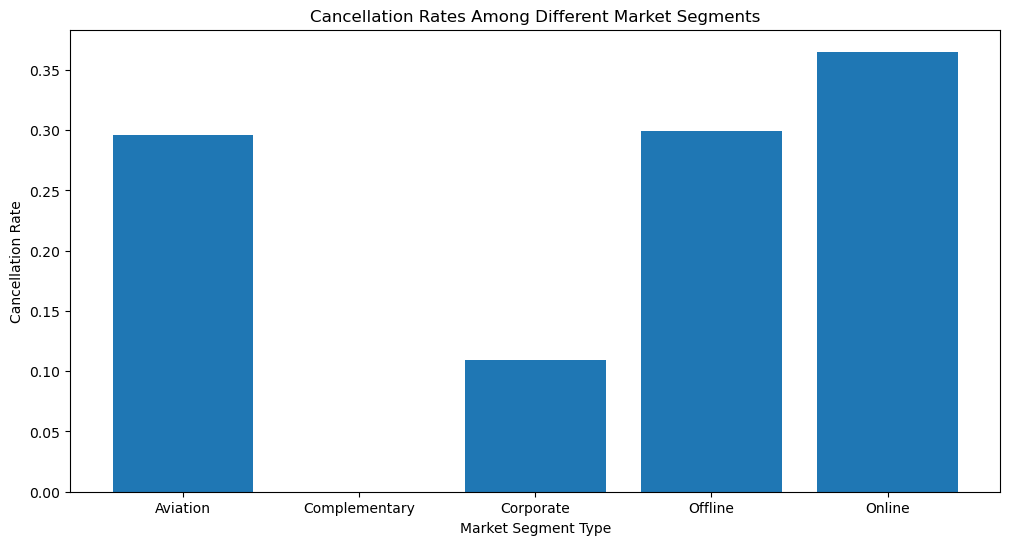

In [44]:
plt.bar(cancellation_rates.index, cancellation_rates.values)
plt.title('Cancellation Rates Among Different Market Segments')
plt.xlabel('Market Segment Type')
plt.ylabel('Cancellation Rate')
plt.show()

### Observation :
* **1)** The cancellation for the online was easy thing to do thats why he is the heighest value Then Followed by the aviation .

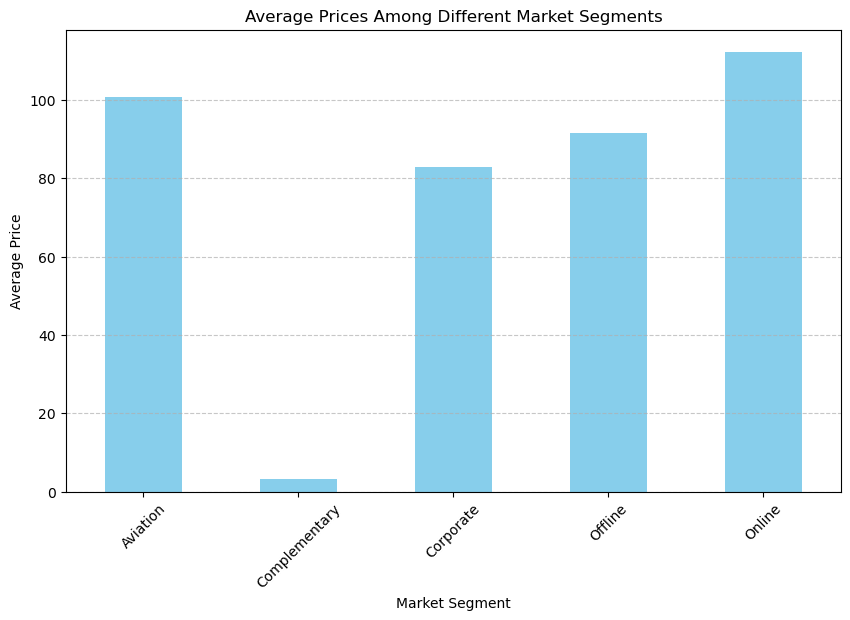

In [45]:
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color='skyblue')
plt.title('Average Prices Among Different Market Segments')
plt.xlabel('Market Segment')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Observation :
* **1)** online also cost some tips thats why he is the heighest value .

#  ===============================================

#### Room Type Analysis

In [46]:
room_type_counts = df['room type'].value_counts()
print("Booking preferences for different room types:")
print(room_type_counts)

Booking preferences for different room types:
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room type, dtype: int64


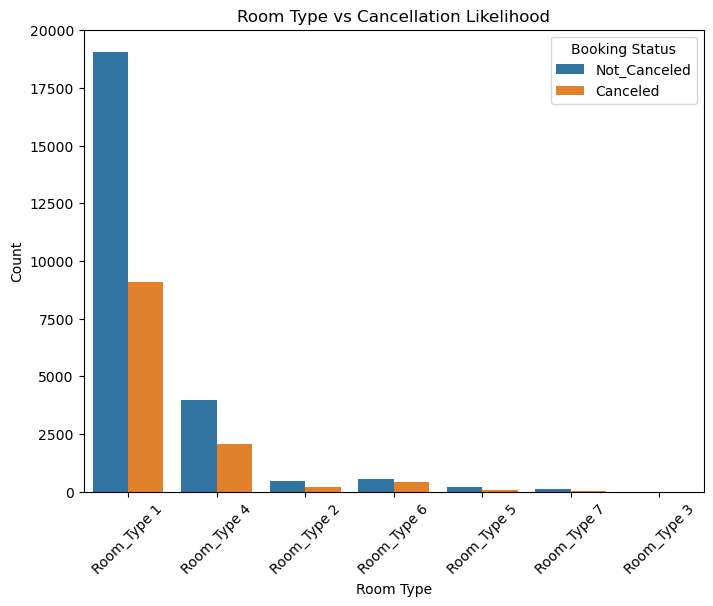

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x='room type', hue='booking status', data=df)
plt.title('Room Type vs Cancellation Likelihood')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.xticks(rotation=45)
plt.show()

### Observation :
* **1)** Room_type 1 is the cheapest so thats indicate that people rent this type most

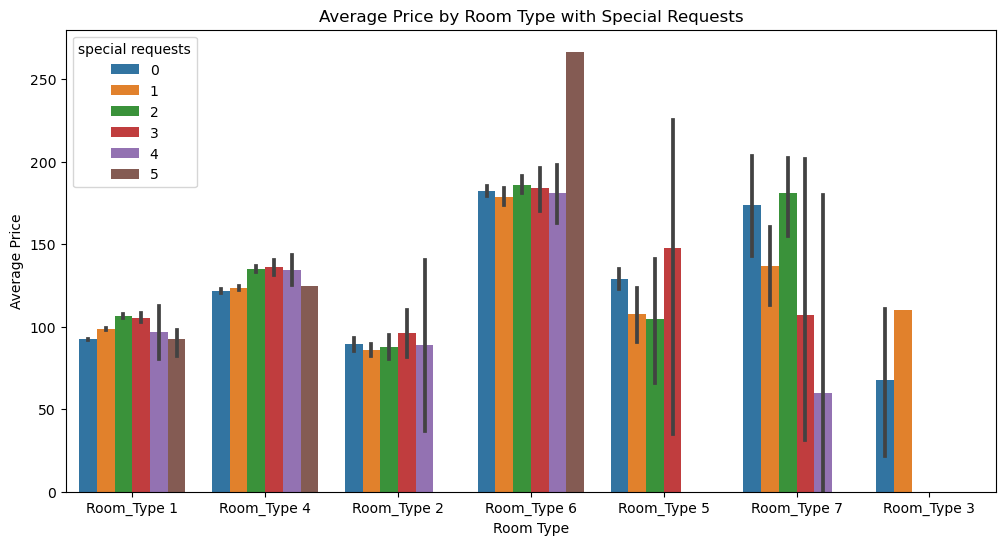

In [48]:
sns.barplot(data=df, x='room type', y='average price',hue='special requests') #palette=None This option is to spacifiy the color based on what i want
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type with Special Requests')
plt.show()

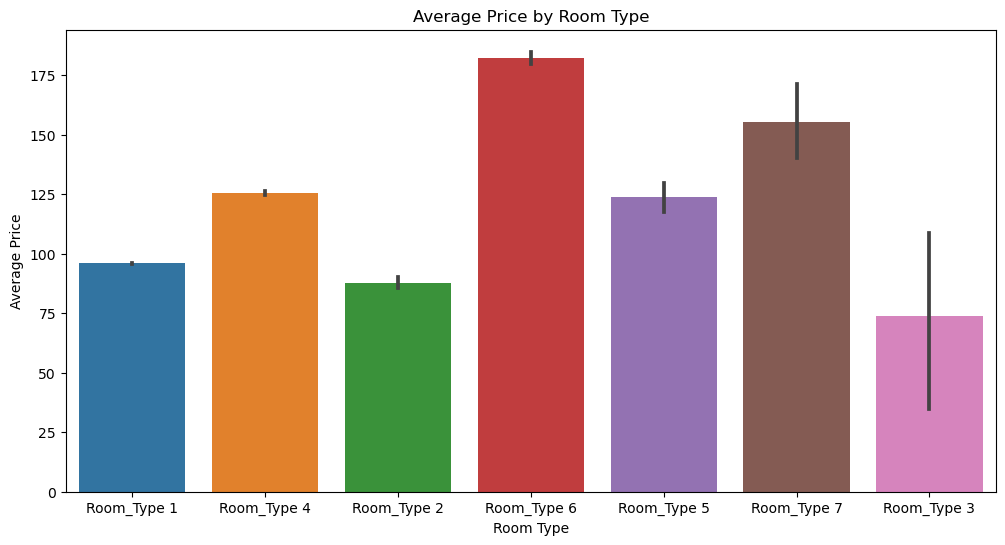

In [49]:
sns.barplot(data=df, x='room type', y='average price')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.show()


* **1)**   Room_type 6 is the most requierd room and the heighest price so its a fancy room
* **2)**   most of the special request is for Room_type 6 it means that its likely the rich pepole booking it
* **3)**   special request 5 is the heighest price among all the special request

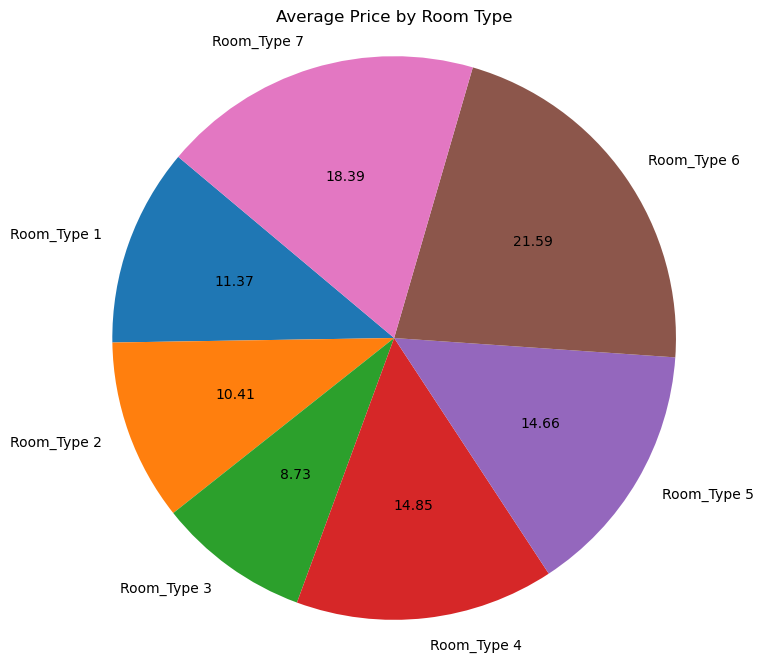

In [50]:
average_prices = df.groupby('room type')['average price'].mean()

plt.figure(figsize=(8, 8))
plt.pie(average_prices, labels=average_prices.index, startangle=140, autopct='%1.2f')
plt.title('Average Price by Room Type')
plt.axis('equal')
plt.show()


In [51]:
average_prices

room type
Room_Type 1     95.917067
Room_Type 2     87.848555
Room_Type 3     73.678571
Room_Type 4    125.285415
Room_Type 5    123.733623
Room_Type 6    182.212836
Room_Type 7    155.198291
Name: average price, dtype: float64

In [52]:
special_requests_counts = df['special requests'].value_counts()
print("Common Special Requests:")
print(special_requests_counts)

Common Special Requests:
0    19780
1    11379
2     4364
3      676
4       78
5        8
Name: special requests, dtype: int64


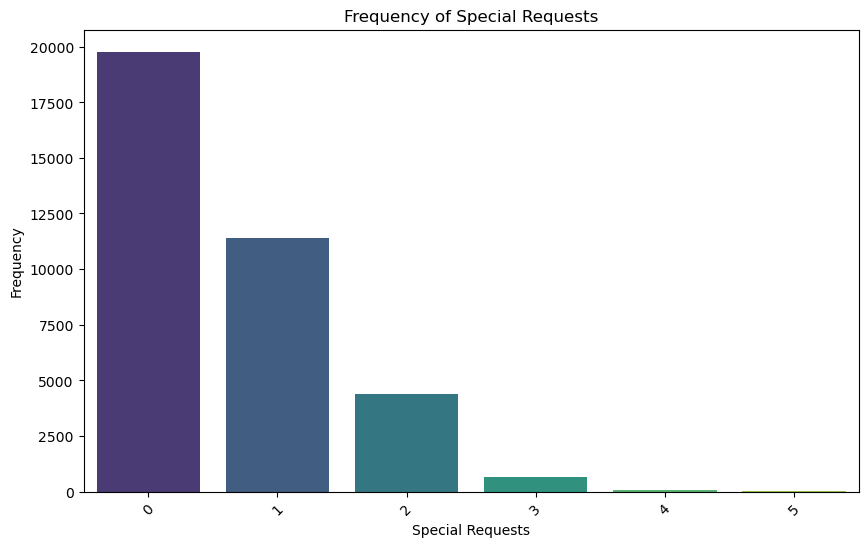

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x=special_requests_counts.index, y=special_requests_counts.values, palette="viridis")
plt.title('Frequency of Special Requests')
plt.xlabel('Special Requests')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### observation:
* **1)**   0 Is the most special request demand liklely to be the cheapest one

In [54]:
cancellation_rates = df.groupby('special requests')['booking status'].value_counts(normalize=True).unstack()
print("\nCancellation Rates by Special Requests:")
print(cancellation_rates)


Cancellation Rates by Special Requests:
booking status    Canceled  Not_Canceled
special requests                        
0                 0.432103      0.567897
1                 0.237719      0.762281
2                 0.145967      0.854033
3                      NaN      1.000000
4                      NaN      1.000000
5                      NaN      1.000000


In [55]:
plt.figure(figsize=(10, 6))
cancellation_rates.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Cancellation Rates by Special Requests')
plt.xlabel('Special Requests')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.legend(title='Booking Status')
plt.show()

<Figure size 1000x600 with 0 Axes>

### observation:
* **1)**  We see from here that the book cancelation occuer in 0,1,2 special request .
* **2)**  its likely that this is one of the cancellation reasons (Maybe Bad Request)(doesnt fit all the People)

In [56]:
monthly_bookings = df.groupby(['Year', 'Month']).size()
monthly_bookings.plot(kind='line', figsize=(10, 6), marker='o', title='Monthly Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()


* **1)** The Booking occure the most from july to october.  
* **2)** Maybe its a summer holidays time  

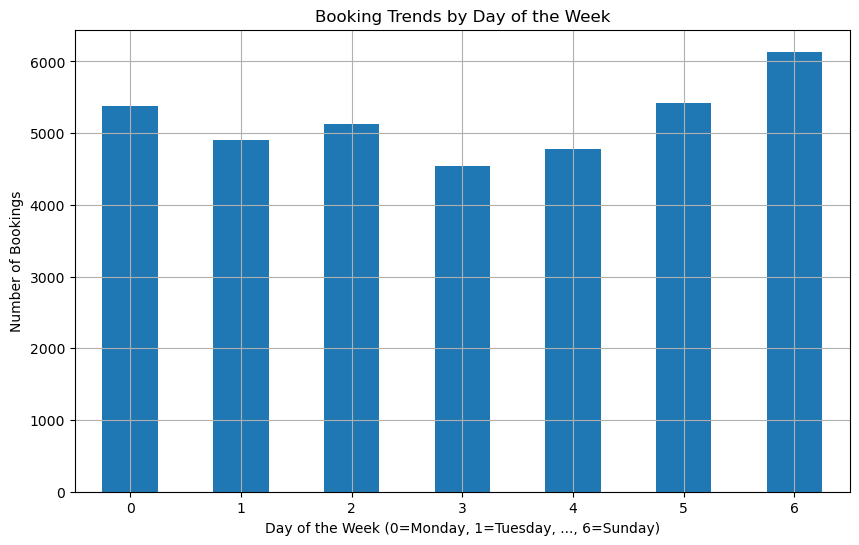

In [57]:
day_of_week_bookings = df.groupby('Day_of_week').size() # size= count of the days
day_of_week_bookings.plot(kind='bar', figsize=(10, 6), title='Booking Trends by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 1=Tuesday, ..., 6=Sunday)')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


* **1)** The Booking occure the most in Sunday  in usa its A day off for most people thats maybe the reason

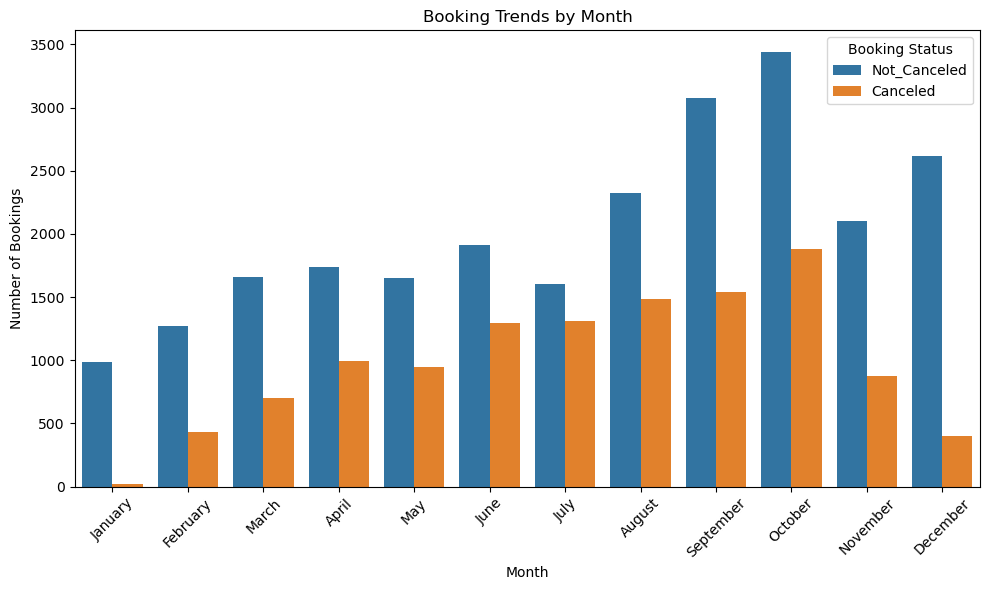

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', hue='booking status')
plt.title('Booking Trends by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(ticks=range(0, 12), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
], rotation=45)
plt.legend(title='Booking Status')
plt.tight_layout()
plt.show()

In [61]:
sns.countplot(data=df,x='Year',hue='booking status')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Bookings by Year and Booking Status')
plt.legend(title='Booking Status')
plt.show()

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Day_of_week', hue='booking status')
plt.title('Booking Trends by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bookings')
plt.xticks(ticks=range(7), labels=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.legend(title='Booking Status')
plt.tight_layout()
plt.show()


* **1)** september and October is the month where the booking occuers the most , Maybe because of the good wather  
* **2)** year 2018 was the most booking year because of the increasing of the hotels Maybe  
* **3)** most people doesnt cancel the booking in both Figuers
* **4)** most of the booking occuer in sunday and also we see the cancellation occuer in sunday also

In [63]:
parking_booking_counts = df.groupby(['car parking space', 'booking status']).size().unstack(fill_value=0)
print("Booking counts based on parking space availability:")
print(parking_booking_counts)

Booking counts based on parking space availability:
booking status     Canceled  Not_Canceled
car parking space                        
0                     11775         23386
1                       114          1010


In [64]:
parking_cancel_counts = df[df['booking status'] == 'Canceled'].groupby('car parking space').size()
total_cancel_counts = df['booking status'].value_counts()['Canceled']
cancel_rates = (parking_cancel_counts / total_cancel_counts) * 100
print("\nCancellation rates based on parking space availability:")
print(cancel_rates)


Cancellation rates based on parking space availability:
car parking space
0    99.04113
1     0.95887
dtype: float64


In [65]:
average_price_by_parking = df.groupby('car parking space')['average price'].mean()
print("\nAverage price based on parking space availability:")
print(average_price_by_parking)


Average price based on parking space availability:
car parking space
0    103.037026
1    115.453016
Name: average price, dtype: float64


In [66]:
sns.countplot(x='car parking space', hue='booking status', data=df)
plt.title('Booking Counts based on Parking Space Availability')
plt.xlabel('Car Parking Space')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.show()

### Observations :
* **1)** most people choose with no parking means they are not coming by there own cars .  
* **2)** the people how choose parking most likely that they are coming in there cars.  

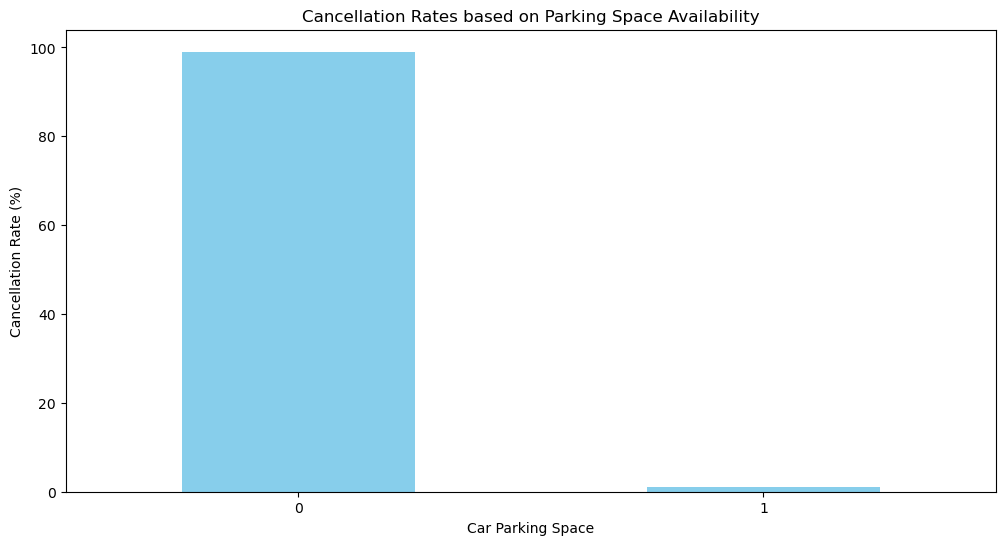

In [67]:
cancel_rates.plot(kind='bar', color='skyblue')
plt.title('Cancellation Rates based on Parking Space Availability')
plt.xlabel('Car Parking Space')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=0)
plt.show()


* **1)** We see That the cancellation also occuer in the no parking space the most

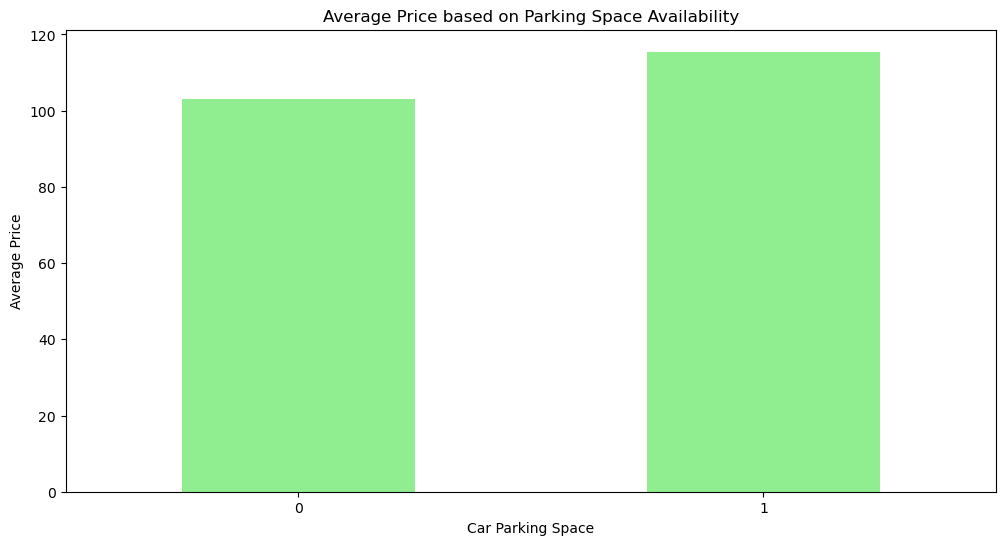

In [68]:
average_price_by_parking.plot(kind='bar', color='lightgreen')
plt.title('Average Price based on Parking Space Availability')
plt.xlabel('Car Parking Space')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()


* **1)** here we see that if you want a parking space it will cost you more money


In [69]:
booking_labels=df['booking status'].value_counts().index
booking_status=df['booking status'].value_counts().values

In [70]:
plt.pie(booking_status,labels=booking_labels, autopct='%1.1f%%')
plt.title('Booking Status Distribution')
plt.axis('equal')
plt.show()

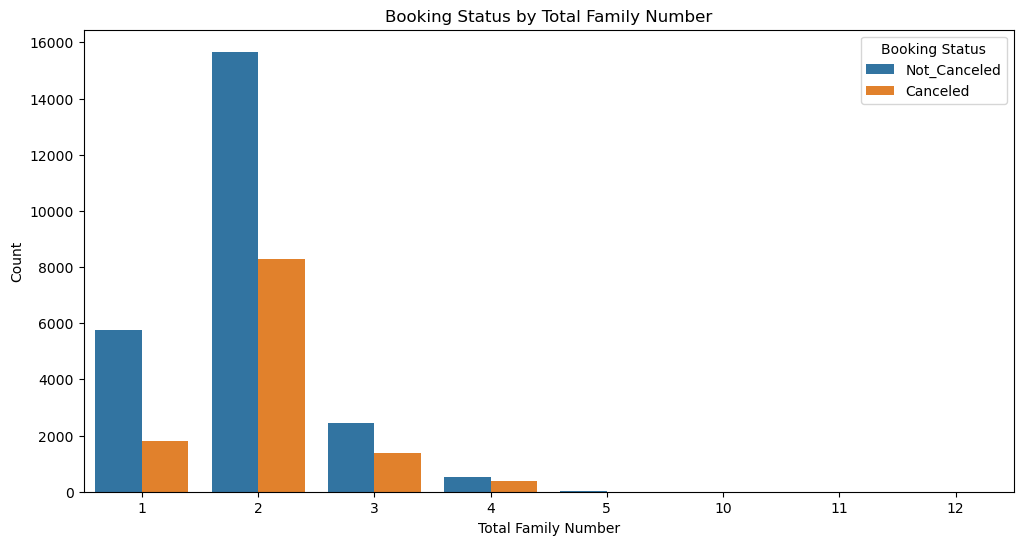

In [71]:
sns.countplot(data=df,x='Total_Family_Number',hue='booking status')
plt.xlabel('Total Family Number')
plt.ylabel('Count')
plt.title('Booking Status by Total Family Number')
plt.legend(title='Booking Status')
plt.show()


* **1)**   we see that the Family with 2 members are the most booking and cancelling
* **2)**   indicate that Family with low number of members are most liklely booking and cancelling

### Repeated vs Cancelation  Analysis

In [72]:
plt.figure(figsize=(8, 6))
sns.countplot(x='repeated', hue='booking status', data=df)
plt.title('Booking Status by Repeated Booking')
plt.xlabel('Repeated Booking')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.show()

### observation:
* **1)**   we see that who ever does repeate the booking its likely not cancelling  

### Prob of cancelation and not cancelation  vs the booking status Analysis

In [73]:
prob_pc = df[df['booking status'] == 'Canceled']['P-C'].mean()
prob_not_pc = df[df['booking status'] == 'Not_Canceled']['P-not-C'].mean()

In [74]:
plt.figure(figsize=(8, 6))
bars = plt.bar(x=['Canceled', 'Not Canceled'], height=[prob_pc, prob_not_pc], color=['skyblue', 'lightgreen'])
plt.title('Probability of P-C and P-not-C by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Probability')
plt.legend(bars, ['P-C', 'P-not-C'])
plt.show()


* **1)**   we see that the if there is an prob of cancellation he will cancel most likely

### Type of meal vs price

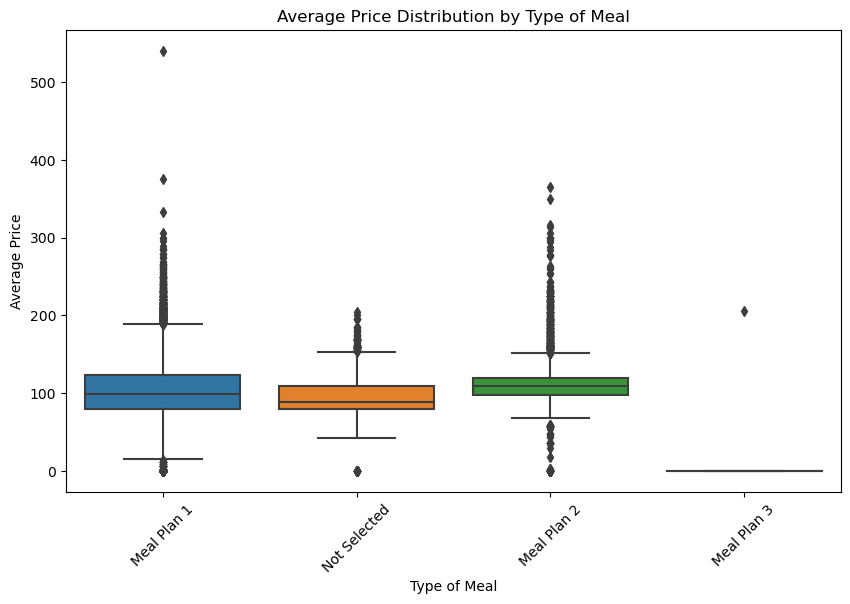

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type of meal', y='average price', data=df)
plt.title('Average Price Distribution by Type of Meal')
plt.xlabel('Type of Meal')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

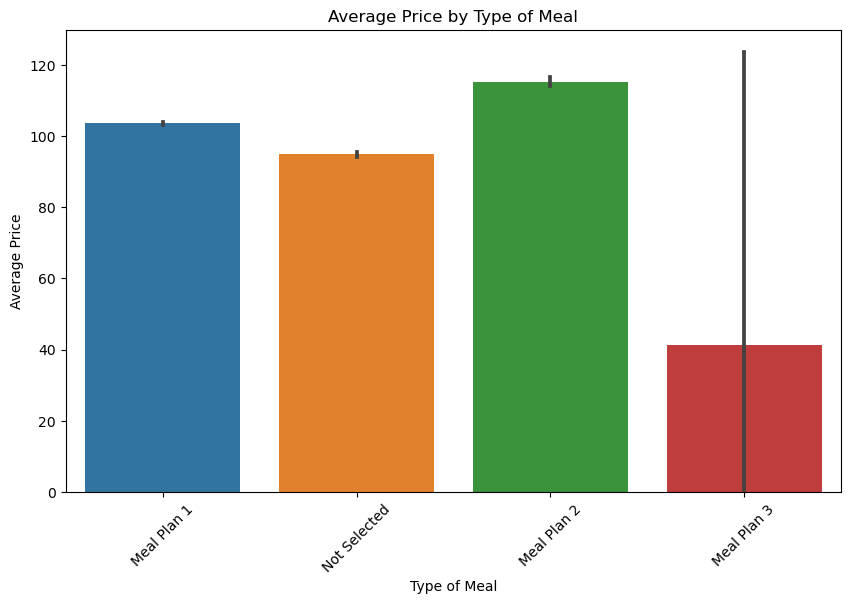

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x='type of meal', y='average price', data=df)
plt.title('Average Price by Type of Meal')
plt.xlabel('Type of Meal')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type of meal', data=df)
plt.title('Meal Frequency')
plt.xlabel('Type of Meal')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

# Observation :
* **1)** Meal type 1 is the most required meal Thats mean its a good meal and its price fit to every one
* **2)** Meal type 2 has the heighest price

In [78]:
df[df['average price']==max(df['average price'])]

type of meal  car parking space    room type  lead time  \
33114  Meal Plan 1                  0  Room_Type 1         35   

      market segment type  repeated  P-C  P-not-C  average price  \
33114             Offline         0    0        0          540.0   

       special requests booking status  Total_Family_Number  Month  Year  \
33114                 0       Canceled                    2      3  2018   

       Day_of_week  Days of reservation  
33114            6                    1

In [79]:
df[df['Days of reservation']==7].head()

type of meal  car parking space    room type  lead time  \
0     Meal Plan 1                  0  Room_Type 1        224   
50   Not Selected                  0  Room_Type 1        124   
78    Meal Plan 1                  0  Room_Type 4        155   
94    Meal Plan 1                  0  Room_Type 1        171   
116   Meal Plan 1                  0  Room_Type 4         40   

    market segment type  repeated  P-C  P-not-C  average price  \
0               Offline         0    0        0          88.00   
50               Online         0    0        0          87.95   
78               Online         0    0        0         121.55   
94               Online         0    0        0         111.59   
116              Online         0    0        0         135.76   

     special requests booking status  Total_Family_Number  Month  Year  \
0                   0   Not_Canceled                    2     10  2015   
50                  0   Not_Canceled                    1      5  2018   
78                  2       Canceled                    3      6  2018   
94                  0       Canceled                    2      8  2018   
116                 0       Canceled                    3      4  2018   

     Day_of_week  Days of reservation  
0              4                    7  
50             2                    7  
78             3                    7  
94             3                    7  
116            6                    7

In [80]:
df.columns

Index(['type of meal', 'car parking space', 'room type', 'lead time',
       'market segment type', 'repeated', 'P-C', 'P-not-C', 'average price',
       'special requests', 'booking status', 'Total_Family_Number', 'Month',
       'Year', 'Day_of_week', 'Days of reservation'],
      dtype='object')

In [81]:
numerical_features = ['Days of reservation','lead time', 'P-C', 'P-not-C', 'average price', 'special requests', 'Total_Family_Number']

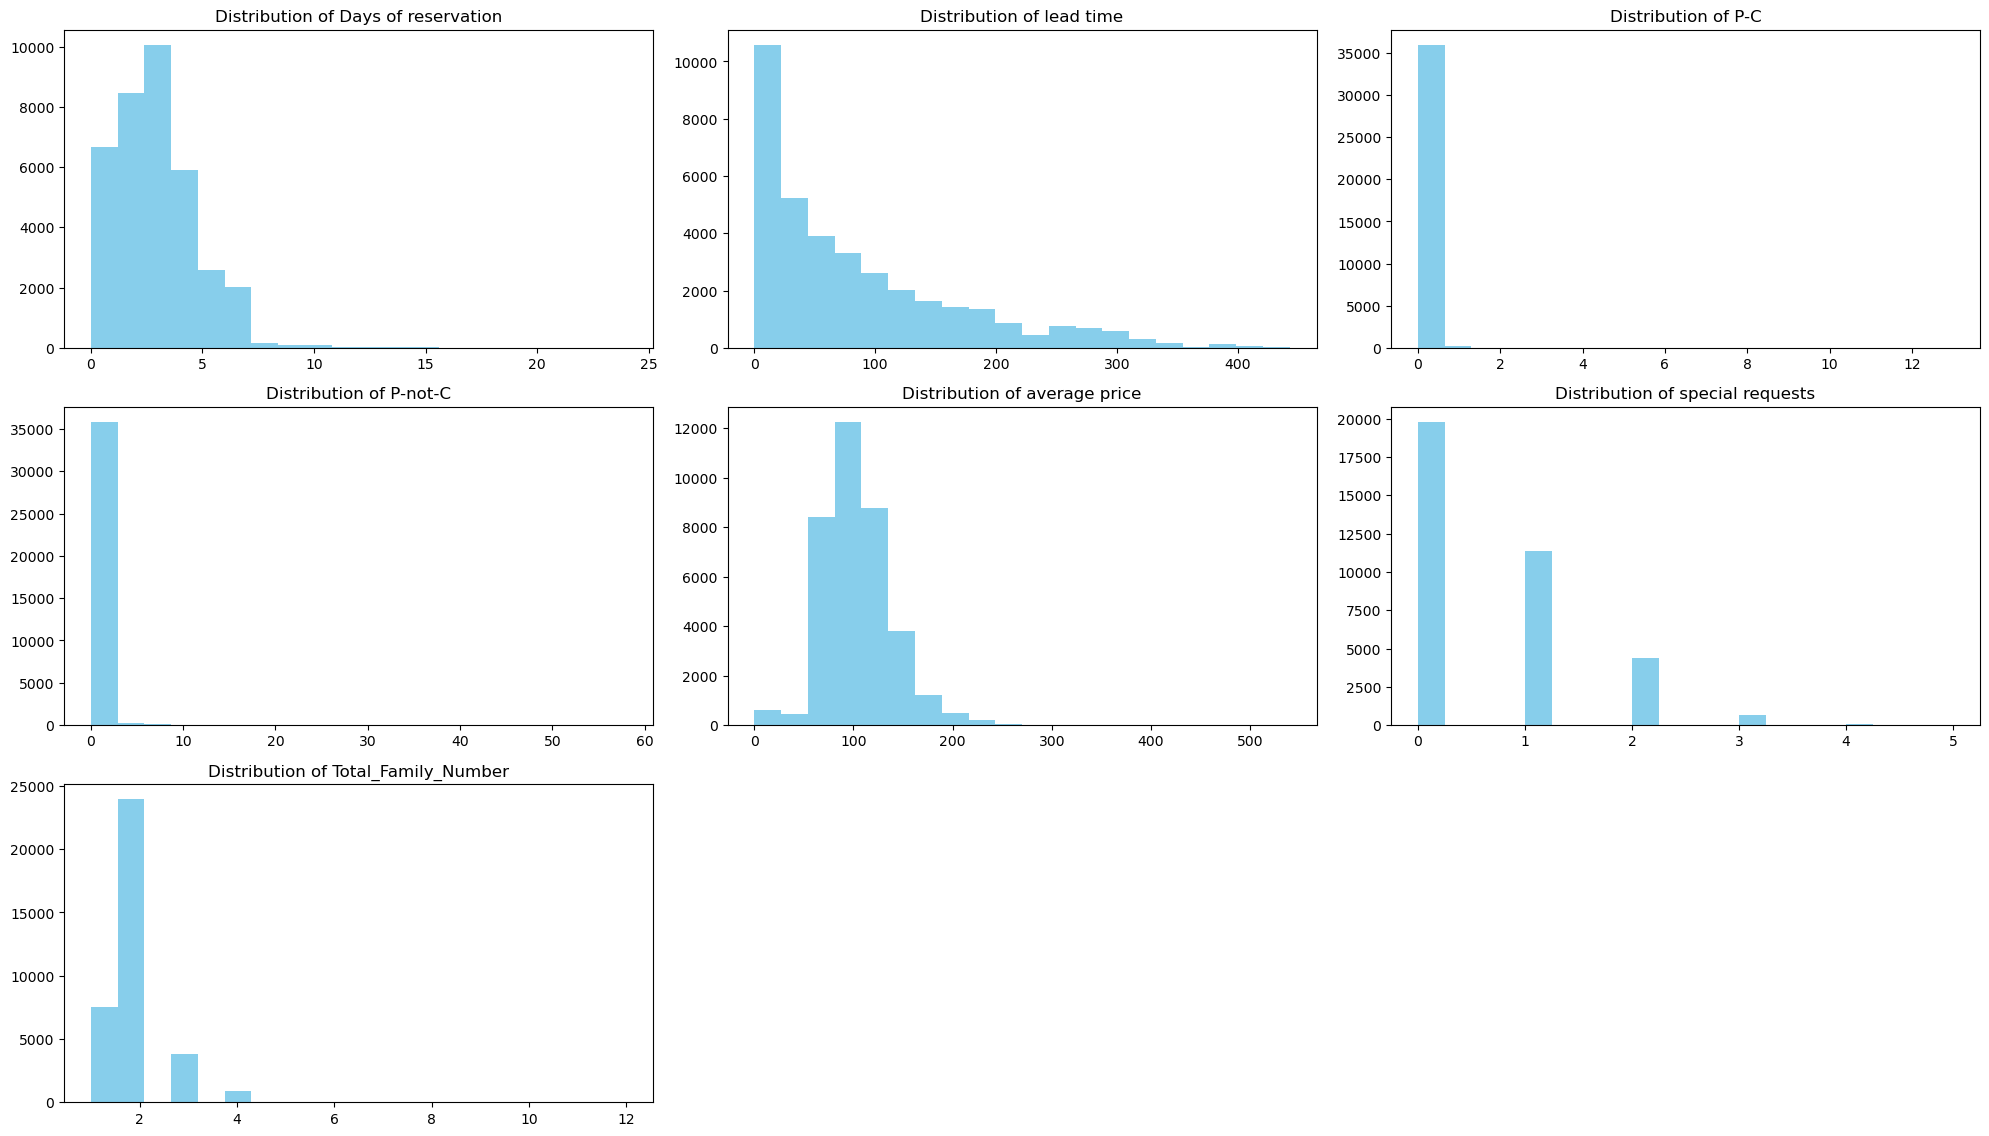

In [82]:
plt.figure(figsize=(20, 15))

for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(4, 3, i)
    plt.hist(df[feature], bins=20, color='skyblue')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [83]:
# df.isnull().sum()

In [84]:
# def iqr_method(df):
#     perc_75 = np.percentile(df, 75)
#     perc_25 = np.percentile(df, 25)
#     iqr_range = perc_75 - perc_25
#     iqr_upper = perc_75 + 1.5 * iqr_range
#     iqr_lower = perc_25 - 1.5 * iqr_range
#     return(iqr_lower,iqr_upper)

In [85]:
# lower,upper=iqr_method(df['average price'])
# print('upper limit for price   = ', upper )
# print('lower limit for price   = ', lower)

In [86]:
# df=df[(df['average price']>lower)&(df['average price']<upper)]

In [87]:
# lower,upper=iqr_method(df['lead time'])
# print('upper limit for price   = ', upper )
# print('lower limit for price   = ', lower)

In [88]:
# df=df[(df['lead time']>lower)&(df['lead time']<upper)]

### using z-score



In [89]:
def remove_outliers(df, threshold=3):
    cols = ['lead time', 'average price']
    df_clean = df.copy()
            # initialize a new dataframe to avoid modifying the original
    for col in cols:
        zscore = (df_clean[col] - df_clean[col].mean()) / df_clean[col].std()
        df_clean = df_clean[abs(zscore) <= threshold]
    return df_clean

In [90]:
df=remove_outliers(df)

In [91]:
df.head()

type of meal  car parking space    room type  lead time  \
0   Meal Plan 1                  0  Room_Type 1        224   
1  Not Selected                  0  Room_Type 1          5   
2   Meal Plan 1                  0  Room_Type 1          1   
3   Meal Plan 1                  0  Room_Type 1        211   
4  Not Selected                  0  Room_Type 1         48   

  market segment type  repeated  P-C  P-not-C  average price  \
0             Offline         0    0        0          88.00   
1              Online         0    0        0         106.68   
2              Online         0    0        0          50.00   
3              Online         0    0        0         100.00   
4              Online         0    0        0          77.00   

   special requests booking status  Total_Family_Number  Month  Year  \
0                 0   Not_Canceled                    2     10  2015   
1                 1   Not_Canceled                    1     11  2018   
2                 0       Canceled                    3      2  2018   
3                 1       Canceled                    1      5  2017   
4                 0       Canceled                    1      4  2018   

   Day_of_week  Days of reservation  
0            4                    7  
1            1                    4  
2            2                    4  
3            5                    2  
4            2                    3

In [92]:
df['booking status']=df['booking status'].map({'Not_Canceled':0,'Canceled':1})
df.head()

type of meal  car parking space    room type  lead time  \
0   Meal Plan 1                  0  Room_Type 1        224   
1  Not Selected                  0  Room_Type 1          5   
2   Meal Plan 1                  0  Room_Type 1          1   
3   Meal Plan 1                  0  Room_Type 1        211   
4  Not Selected                  0  Room_Type 1         48   

  market segment type  repeated  P-C  P-not-C  average price  \
0             Offline         0    0        0          88.00   
1              Online         0    0        0         106.68   
2              Online         0    0        0          50.00   
3              Online         0    0        0         100.00   
4              Online         0    0        0          77.00   

   special requests  booking status  Total_Family_Number  Month  Year  \
0                 0               0                    2     10  2015   
1                 1               0                    1     11  2018   
2                 0               1                    3      2  2018   
3                 1               1                    1      5  2017   
4                 0               1                    1      4  2018   

   Day_of_week  Days of reservation  
0            4                    7  
1            1                    4  
2            2                    4  
3            5                    2  
4            2                    3

In [93]:
columns_to_encode = ['room type', 'type of meal', 'market segment type']
one_hot_encoder = OneHotEncoder(sparse=False)  
encoded_columns = one_hot_encoder.fit_transform(df[columns_to_encode])
one_hot_column_names = one_hot_encoder.get_feature_names_out(columns_to_encode)
df.drop(columns=columns_to_encode, inplace=True)
df[one_hot_column_names] = encoded_columns

In [94]:
X=df.drop(columns=['booking status'])
y=df['booking status']

### Feature Selection

In [95]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)
sfm = SelectFromModel(clf, threshold=0.05)  # Adjust threshold as needed
sfm.fit(X, y)
selected_features = X.columns[sfm.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['lead time', 'average price', 'special requests', 'Month',
       'Day_of_week', 'Days of reservation'],
      dtype='object')


In [96]:
corr_matrix=df[selected_features].corr()

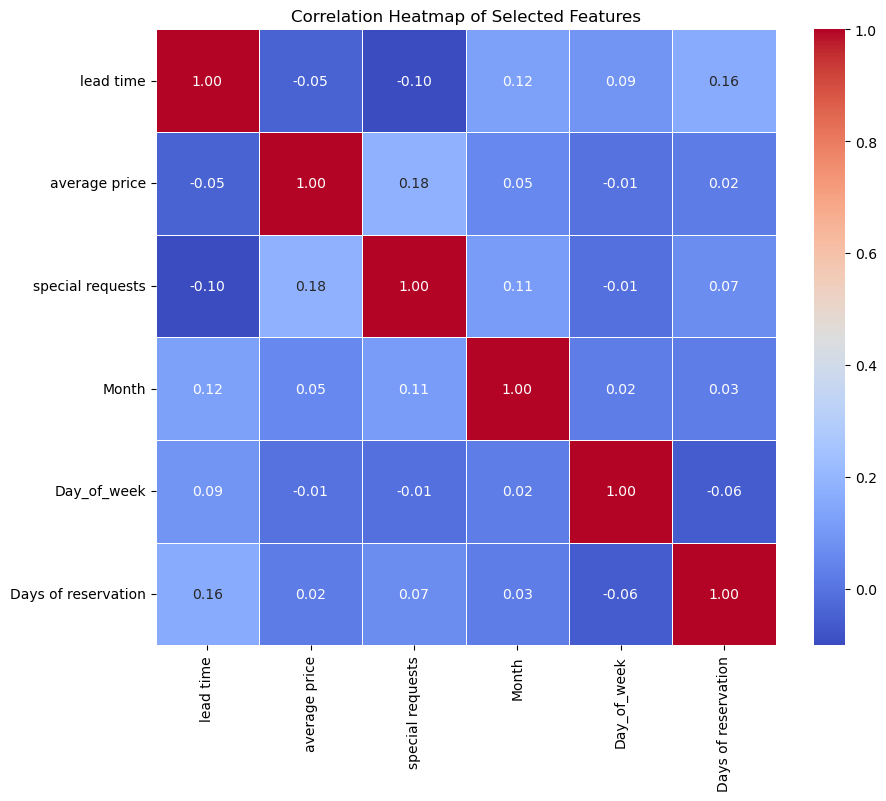

In [97]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

In [98]:
X=df[selected_features]
y=df['booking status']

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20,stratify=y)

In [100]:
# correlation_matrix = df.corr()

# plt.figure(figsize=(20, 20))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
# plt.title('Correlation Heatmap')
# plt.show()

In [101]:
# def forword_selection(data,target,sig_level=0.05):
#     init_features=data.columns.tolist()
#     best_features=[]
#     while(len(init_features)>0):
#         remaning_feature=list(set(init_features)-set(best_features))
#         new_pval=pd.Series(index=remaning_feature)
#         for new_column in remaning_feature:
#             model=sm.OLS(target,sm.add_constant(data[best_features+[new_column]])).fit()
#             new_pval[new_column]=model.pvalues[new_column]
#             min_p_value=new_pval.min()
#             if(min_p_value<sig_level):
#                 best_features.append(new_pval.idxmin())
#             else:
#                 break
#     return best_features

# Modeling and Tuning

#### LogisticRegression

In [102]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_proba = logreg.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)


a_Logistic_Regression = round(accuracy_score(y_test, y_pred) * 100,2)
f_Logistic_Regression = round(f1_score(y_test, y_pred) * 100,2)
p_Logistic_Regression = round(precision_score(y_test, y_pred) * 100,2)
r_Logistic_Regression = round(recall_score(y_test, y_pred) * 100,2)

train_accuracy = round(accuracy_score(y_train, logreg.predict(X_train)*100),2)

print("Accuracy of Logistic Regression:", a_Logistic_Regression)
print("F1 Score of Logistic Regression:", f_Logistic_Regression)
print("Precision of Logistic Regression:", p_Logistic_Regression)
print("Recall of Logistic Regression:", r_Logistic_Regression)
print("Training Accuracy:", train_accuracy)


Accuracy of Logistic Regression: 78.26
F1 Score of Logistic Regression: 60.72
Precision of Logistic Regression: 71.86
Recall of Logistic Regression: 52.57
Training Accuracy: 0.61


#### DecisionTreeClassifier

In [103]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
a_Decision_Tree = round(accuracy_score(y_test, y_pred) * 100,2)
f_Decision_Tree = round(f1_score(y_test, y_pred) * 100,2)
p_Decision_Tree = round(precision_score(y_test, y_pred) * 100,2)
r_Decision_Tree = round(recall_score(y_test, y_pred) * 100,2)
train_accuracy = round(accuracy_score(y_train, dt.predict(X_train)*100),2)



print("Accuracy of Decision Tree:", a_Decision_Tree)
print("F1 Score of Decision Tree:", f_Decision_Tree)
print("Precision of Decision Tree:", p_Decision_Tree)
print("Recall of Decision Tree:", r_Decision_Tree)
print("Training Accuracy:", train_accuracy)

Accuracy of Decision Tree: 80.42
F1 Score of Decision Tree: 62.54
Precision of Decision Tree: 80.53
Recall of Decision Tree: 51.12
Training Accuracy: 0.64


#### RandomForestClassifier

In [104]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
a_random_forest = round(accuracy_score(y_test, y_pred) * 100,2)
f_random_forest = round(f1_score(y_test, y_pred) * 100,2)
p_random_forest = round(precision_score(y_test, y_pred) * 100,2)
r_random_forest = round(recall_score(y_test, y_pred) * 100,2)
train_accuracy =round(accuracy_score(y_train, rf.predict(X_train)*100),2)


print("Training Accuracy:", train_accuracy)
print("Accuracy of Random Forest:", a_random_forest)
print("F1 Score of Random Forest:", f_random_forest)
print("Precision of Random Forest:", p_random_forest)
print("Recall of Random Forest:", r_random_forest)

Training Accuracy: 0.65
Accuracy of Random Forest: 80.31
F1 Score of Random Forest: 60.43
Precision of Random Forest: 84.51
Recall of Random Forest: 47.03


#### KNeighborsClassifier

In [105]:
st=StandardScaler()
scaled_train=st.fit_transform(X_train)
scaled_test=st.transform(X_test)


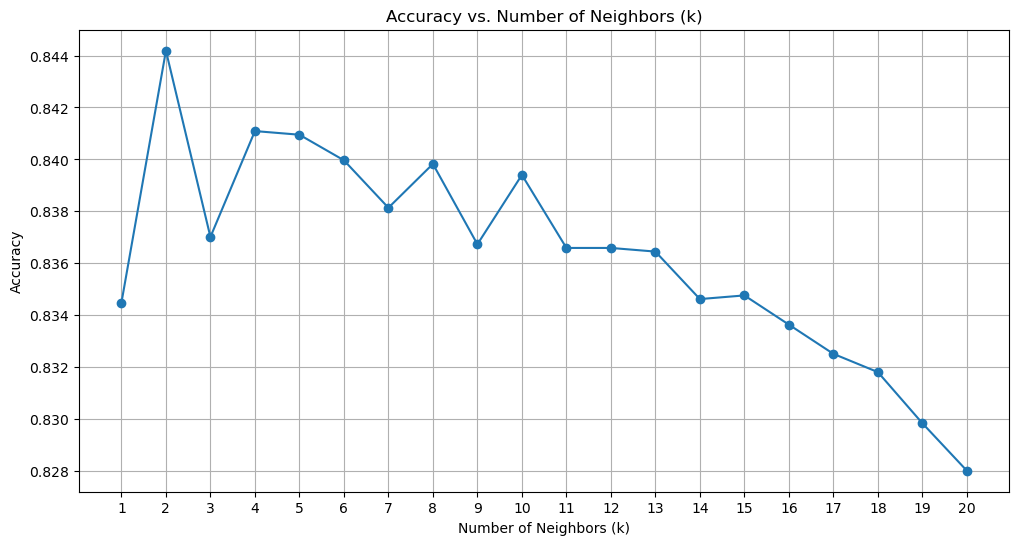

Best k: 2


In [106]:
k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_train, y_train)
    accuracy = knn.score(scaled_test, y_test)
    accuracies.append(accuracy)
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

best_k_index = np.argmax(accuracies)

best_k = k_values[best_k_index]

print("Best k:", best_k)


In [107]:
k = KNeighborsClassifier(n_neighbors=2)
k.fit(scaled_train,y_train)
y_pred = k.predict(scaled_test)

a_k_neighbors = round(accuracy_score(y_test, y_pred) * 100,2)
f_k_neighbors = round(f1_score(y_test, y_pred) * 100,2)
p_k_neighbors = round(precision_score(y_test, y_pred) * 100,2)
r_k_neighbors = round(recall_score(y_test, y_pred) * 100,2)
train_accuracy = round(accuracy_score(y_train, k.predict(scaled_train)*100),2)


print("Accuracy of K-Nearest Neighbors:", a_k_neighbors)
print("F1 Score of K-Nearest Neighbors:", f_k_neighbors)
print("Precision of K-Nearest Neighbors:", p_k_neighbors)
print("Recall of K-Nearest Neighbors:", r_k_neighbors)
print("Training Accuracy:", train_accuracy)

Accuracy of K-Nearest Neighbors: 84.42
F1 Score of K-Nearest Neighbors: 71.63
Precision of K-Nearest Neighbors: 85.67
Recall of K-Nearest Neighbors: 61.55
Training Accuracy: 0.68


#### GradientBoostingClassifier

In [108]:
gbt = GradientBoostingClassifier(n_estimators = 150,max_depth=5)
gbt.fit(X_train,y_train)
y_pred = gbt.predict(X_test)

train_accuracy = round(accuracy_score(y_train,gbt.predict(X_train)*100),2)
a_Gradient_Boosting = round(accuracy_score(y_test, y_pred) * 100,2)
f_Gradient_Boosting = round(f1_score(y_test, y_pred) * 100,2)
p_Gradient_Boosting = round(precision_score(y_test, y_pred) * 100,2)
r_Gradient_Boosting = round(recall_score(y_test, y_pred) * 100,2)

print("Accuracy of Gradient Boosting:", a_Gradient_Boosting)
print("F1 Score of Gradient Boosting:", f_Gradient_Boosting)
print("Precision of Gradient Boosting:", p_Gradient_Boosting)
print("Recall of Gradient Boosting:", r_Gradient_Boosting)
print("Training Accuracy:", train_accuracy)

Accuracy of Gradient Boosting: 85.84
F1 Score of Gradient Boosting: 75.45
Precision of Gradient Boosting: 84.63
Recall of Gradient Boosting: 68.06
Training Accuracy: 0.65


#### GaussianNB

In [109]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


train_accuracy =round(accuracy_score(y_train,clf.predict(X_train)*100),2)
a_Naive_Bayes = round(accuracy_score(y_test, y_pred) * 100,2)
f_Naive_Bayes = round(f1_score(y_test, y_pred) * 100,2)
p_Naive_Bayes = round(precision_score(y_test, y_pred) * 100,2)
r_Naive_Bayes = round(recall_score(y_test, y_pred) * 100,2)


print("Accuracy of Naive Bayes:", a_Naive_Bayes)
print("F1 Score of Naive Bayes:", f_Naive_Bayes)
print("Precision of Naive Bayes:", p_Naive_Bayes)
print("Recall of Naive Bayes:", r_Naive_Bayes)
print("Training Accuracy:", train_accuracy)

Accuracy of Naive Bayes: 76.91
F1 Score of Naive Bayes: 57.28
Precision of Naive Bayes: 70.08
Recall of Naive Bayes: 48.44
Training Accuracy: 0.61


#### Svc

In [110]:
sv = SGDClassifier()
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)

train_accuracy =round(accuracy_score(y_train,sv.predict(X_train)*100),2)
a_SVC = round(accuracy_score(y_test, y_pred) * 100,2)
f_SVC = round(f1_score(y_test, y_pred) * 100,2)
p_SVC = round(precision_score(y_test, y_pred) * 100,2)
r_SVC = round(recall_score(y_test, y_pred) * 100,2)

print("Accuracy of SVC:", a_SVC)
print("F1 Score of SVC:", f_SVC)
print("Precision of SVC:", p_SVC)
print("Recall of SVC:", r_SVC)
print("Training Accuracy:", train_accuracy)

Accuracy of SVC: 75.94
F1 Score of SVC: 63.86
Precision of SVC: 61.41
Recall of SVC: 66.52
Training Accuracy: 0.54


### XGB

In [111]:
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss',  # Evaluation metric
    n_estimators=100,  # Number of boosting rounds
    max_depth=6,  # Maximum tree depth
    learning_rate=0.3,  # Learning rate
    subsample=0.8,  # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    random_state=42
)

model.fit(X_train, y_train)


train_accuracy =round(accuracy_score(y_train,sv.predict(X_train)*100),2)
a_xgb = round(accuracy_score(y_test, y_pred) * 100,2)
f_xgb = round(f1_score(y_test, y_pred) * 100,2)
p_xgb = round(precision_score(y_test, y_pred) * 100,2)
r_xgb = round(recall_score(y_test, y_pred) * 100,2)

print("Accuracy of SVC:", a_xgb)
print("F1 Score of SVC:", f_xgb)
print("Precision of SVC:", p_xgb)
print("Recall of SVC:", r_xgb)
print("Training Accuracy:", train_accuracy)

Accuracy of SVC: 75.94
F1 Score of SVC: 63.86
Precision of SVC: 61.41
Recall of SVC: 66.52
Training Accuracy: 0.54


In [112]:
models = pd.DataFrame({
    'Model': ['Gradient Boosting','Random Forest','Support Vector Machine','K-Nearest Neighbors','Decision Tree','Logistic Regression','Naive Bayes','XGBClassifier'],
    'Accuracy': [a_Gradient_Boosting, a_random_forest, a_SVC, a_k_neighbors, a_Decision_Tree, a_Logistic_Regression, a_Naive_Bayes,a_xgb],
    'F1-Score': [f_Gradient_Boosting, f_random_forest, f_SVC, f_k_neighbors, f_Decision_Tree, f_Logistic_Regression, f_Naive_Bayes,f_xgb ],
    'Precision': [p_Gradient_Boosting, p_random_forest, p_SVC, p_k_neighbors, p_Decision_Tree, p_Logistic_Regression, p_Naive_Bayes,p_xgb ],
    'Recall': [r_Gradient_Boosting, r_random_forest, r_SVC, r_k_neighbors, r_Decision_Tree, r_Logistic_Regression, r_Naive_Bayes, r_xgb]
             })

sorted_model=models.sort_values(by='Accuracy', ascending=False)
sorted_model

Model  Accuracy  F1-Score  Precision  Recall
0       Gradient Boosting     85.84     75.45      84.63   68.06
3     K-Nearest Neighbors     84.42     71.63      85.67   61.55
4           Decision Tree     80.42     62.54      80.53   51.12
1           Random Forest     80.31     60.43      84.51   47.03
5     Logistic Regression     78.26     60.72      71.86   52.57
6             Naive Bayes     76.91     57.28      70.08   48.44
2  Support Vector Machine     75.94     63.86      61.41   66.52
7           XGBClassifier     75.94     63.86      61.41   66.52

In [113]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=models, order=sorted_model['Model'])
plt.title('Accuracy of Different Models')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

## Lets do Some Tuning

####  LogisticRegression

In [114]:
param_grid = {"C": [0.1, 0.2, 0.5]}

lg=LogisticRegression()

grid_lg=GridSearchCV(estimator=lg,param_grid=param_grid,scoring='accuracy',n_jobs=4,cv=5,refit=True,return_train_score=True)

grid_lg.fit(X_train,y_train)

y_pred=grid_lg.predict(X_test)

### Grid Search propertty
cv_results_df=pd.DataFrame(grid_lg.cv_results_)

print(f"Shape Of Cv : {cv_results_df.shape}")
print(f"best params is : {grid_lg.best_params_}")

pd.set_option("display.max_colwidth",None)
print(cv_results_df.loc[:,"params"])


cv_results = grid_lg.cv_results_
mean_test_scores = cv_results['mean_test_score']
print(f"Mean Test Score for Best Parameters: {mean_test_scores[grid_lg.best_index_]}")


best_row=cv_results_df[cv_results_df['rank_test_score']==1]
best_row


Shape Of Cv : (3, 21)
best params is : {'C': 0.1}
0    {'C': 0.1}
1    {'C': 0.2}
2    {'C': 0.5}
Name: params, dtype: object
Mean Test Score for Best Parameters: 0.7753130563361722


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.119998      0.010956            0.004        0.004899     0.1   

       params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.1}           0.776586           0.776762           0.767446   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.775883  ...         0.775313        0.004168                1   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.775082            0.775873            0.777148   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.775786            0.774213          0.775621         0.000969  

[1 rows x 21 columns]

In [115]:
### Matrics
cm=confusion_matrix(y_test,y_pred)
print(f"confusion_matrix: {cm}")

acc_lg=accuracy_score(y_test,y_pred)
print(f"accuracy_score: {acc_lg}")

pre_lg=precision_score(y_test,y_pred)
print(f"precision_score: {pre_lg}")

rec_lg=recall_score(y_test,y_pred)
print(f"recall_score: {rec_lg}")

f1_lg=f1_score(y_test,y_pred)
print(f"f1_score: {f1_lg}")

confusion_matrix: [[4365  473]
 [1080 1193]]
accuracy_score: 0.7816059625931655
precision_score: 0.7160864345738295
recall_score: 0.5248570171579411
f1_score: 0.6057374968266057


In [116]:
cv_results_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.119998      0.010956         0.004000        0.004899     0.1   
1       0.105998      0.013566         0.002000        0.004001     0.2   
2       0.095998      0.014968         0.004001        0.004900     0.5   

       params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.1}           0.776586           0.776762           0.767446   
1  {'C': 0.2}           0.776586           0.776235           0.767270   
2  {'C': 0.5}           0.776762           0.776059           0.767622   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.775883  ...         0.775313        0.004168                1   
1           0.775883  ...         0.775172        0.004203                3   
2           0.775883  ...         0.775243        0.004075                2   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.775082            0.775873            0.777148   
1            0.775214            0.775478            0.777192   
2            0.775214            0.775390            0.777148   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.775786            0.774213          0.775621         0.000969  
1            0.775346            0.774213          0.775489         0.000962  
2            0.775214            0.774126          0.775418         0.000974  

[3 rows x 21 columns]

In [117]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

### DTree

In [118]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 5, 10, 20],
    'random_state': [42]
}

dt = DecisionTreeClassifier()

number_models=10

random_search_dt = RandomizedSearchCV(estimator=dt, param_distributions=param_grid, n_iter=number_models, cv=10, scoring='accuracy', refit=True,return_train_score=True)

random_search_dt.fit(X_train, y_train)

y_pred=random_search_dt.predict(X_test)

cv_results_df=pd.DataFrame(random_search_dt.cv_results_)

print(f"Shape Of Cv : {cv_results_df.shape}")
print(f"best params is : {random_search_dt.best_params_}")




cv_results = random_search_dt.cv_results_
mean_test_scores = cv_results['mean_test_score']
print(f"Mean Test Score for Best Parameters: {mean_test_scores[random_search_dt.best_index_]}")


best_row=cv_results_df[cv_results_df['rank_test_score']==1]
best_row





Shape Of Cv : (10, 37)
best params is : {'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy'}
Mean Test Score for Best Parameters: 0.8487549158466379


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1       0.030999         0.003            0.001           0.003   

  param_random_state param_min_samples_split param_min_samples_leaf  \
1                 42                       2                      1   

  param_max_leaf_nodes param_max_features param_max_depth  ...  \
1                 None               sqrt              30  ...   

  split2_train_score split3_train_score  split4_train_score  \
1           0.992851           0.993047            0.992617   

   split5_train_score  split6_train_score  split7_train_score  \
1            0.993008              0.9925            0.992539   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
1            0.992734            0.993516          0.992793         0.000315  

[1 rows x 37 columns]

In [119]:
pd.set_option("display.max_colwidth",None)
pd.DataFrame(cv_results_df.loc[:,"params"])

params
0       {'random_state': 42, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_leaf_nodes': 20, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}
1   {'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy'}
2     {'random_state': 42, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_leaf_nodes': 5, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'entropy'}
3   {'random_state': 42, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy'}
4        {'random_state': 42, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_leaf_nodes': 5, 'max_features': 'auto', 'max_depth': 30, 'criterion': 'gini'}
5     {'random_state': 42, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'gini'}
6     {'random_state': 42, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_leaf_nodes': 20, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'entropy'}
7  {'random_state': 42, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_leaf_nodes': 10, 'max_features': 'auto', 'max_depth': None, 'criterion': 'entropy'}
8     {'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': 20, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy'}
9   {'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': 20, 'max_features': 'auto', 'max_depth': None, 'criterion': 'entropy'}

In [120]:
### Matrics
cm=confusion_matrix(y_test,y_pred)
print(f"confusion_matrix: {cm}")

acc_dt=accuracy_score(y_test,y_pred)
print(f"accuracy_score: {acc_dt}")

pre_dt=precision_score(y_test,y_pred)
print(f"precision_score: {pre_dt}")

rec_dt=recall_score(y_test,y_pred)
print(f"recall_score: {rec_dt}")

f1_dt=f1_score(y_test,y_pred)
print(f"f1_score: {f1_dt}")

confusion_matrix: [[4316  522]
 [ 513 1760]]
accuracy_score: 0.8544508507945436
precision_score: 0.7712532865907099
recall_score: 0.774307083150022
f1_score: 0.7727771679473106


### RandomForestClassifier

In [121]:
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 5, 10, 20],
    'bootstrap': [True, False],
    'random_state': [42]
}
number_models=10

random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=number_models, cv=10, scoring='accuracy', refit=True,return_train_score=True)
random_search_rf.fit(X_train, y_train)
y_pred=random_search_rf.predict(X_test)


cv_results_df=pd.DataFrame(random_search_rf.cv_results_)

print(f"Shape Of Cv : {cv_results_df.shape}")
print(f"best params is : {random_search_rf.best_params_}")




cv_results = random_search_rf.cv_results_
mean_test_scores = cv_results['mean_test_score']
print(f"Mean Test Score for Best Parameters: {mean_test_scores[random_search_rf.best_index_]}")


best_row=cv_results_df[cv_results_df['rank_test_score']==1]
best_row



Shape Of Cv : (10, 39)
best params is : {'random_state': 42, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}
Mean Test Score for Best Parameters: 0.8807128132114228


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
9       2.106227      0.014929         0.051006        0.002999   

  param_random_state param_n_estimators param_min_samples_split  \
9                 42                100                       5   

  param_min_samples_leaf param_max_leaf_nodes param_max_features  ...  \
9                      4                 None               sqrt  ...   

  split2_train_score split3_train_score split4_train_score split5_train_score  \
9           0.953787           0.955076           0.954648           0.955195   

   split6_train_score  split7_train_score  split8_train_score  \
9            0.954375            0.954609            0.954883   

   split9_train_score  mean_train_score  std_train_score  
9            0.953594           0.95464         0.000652  

[1 rows x 39 columns]

In [122]:
pd.set_option("display.max_colwidth",None)
pd.DataFrame(cv_results_df.loc[:,"params"])

params
0       {'random_state': 42, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_leaf_nodes': 20, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'gini', 'bootstrap': True}
1      {'random_state': 42, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_leaf_nodes': None, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}
2      {'random_state': 42, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': 5, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': True}
3       {'random_state': 42, 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_leaf_nodes': 20, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'bootstrap': False}
4        {'random_state': 42, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': 20, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}
5  {'random_state': 42, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': 10, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}
6     {'random_state': 42, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_leaf_nodes': 20, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}
7   {'random_state': 42, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': 10, 'max_features': 'auto', 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}
8       {'random_state': 42, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_leaf_nodes': 10, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'gini', 'bootstrap': True}
9   {'random_state': 42, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}

In [123]:
### Matrics
cm=confusion_matrix(y_test,y_pred)
print(f"confusion_matrix: {cm}")

acc_rf=accuracy_score(y_test,y_pred)
print(f"accuracy_score: {acc_rf}")

pre_rf=precision_score(y_test,y_pred)
print(f"precision_score: {pre_rf}")

rec_rf=recall_score(y_test,y_pred)
print(f"recall_score: {rec_rf}")

f1_rf=f1_score(y_test,y_pred)
print(f"f1_score: {f1_rf}")

confusion_matrix: [[4568  270]
 [ 591 1682]]
accuracy_score: 0.8789199831247363
precision_score: 0.8616803278688525
recall_score: 0.7399912010558733
f1_score: 0.7962130177514795


### KNN

In [124]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30],      # Leaf size for ball_tree or kd_tree
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}


number_models=10
random_search_knn = RandomizedSearchCV(estimator=knn, param_distributions=param_grid, n_iter=number_models, cv=10, scoring='accuracy', refit=True,return_train_score=True)
random_search_knn.fit(scaled_train, y_train)
y_pred = random_search_knn.predict(scaled_test)




cv_results_df=pd.DataFrame(random_search_knn.cv_results_)

print(f"Shape Of Cv : {cv_results_df.shape}")
print(f"best params is : {random_search_knn.best_params_}")




cv_results = random_search_knn.cv_results_
mean_test_scores = cv_results['mean_test_score']
print(f"Mean Test Score for Best Parameters: {mean_test_scores[random_search_knn.best_index_]}")


best_row=cv_results_df[cv_results_df['rank_test_score']==1]
best_row


Shape Of Cv : (10, 35)
best params is : {'weights': 'distance', 'n_neighbors': 20, 'metric': 'manhattan', 'leaf_size': 30, 'algorithm': 'kd_tree'}
Mean Test Score for Best Parameters: 0.8689353345247539


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_weights  \
6       0.024997      0.004994         0.118018        0.008717      distance   

  param_n_neighbors param_metric param_leaf_size param_algorithm  \
6                20    manhattan              30         kd_tree   

                                                                                                       params  \
6  {'weights': 'distance', 'n_neighbors': 20, 'metric': 'manhattan', 'leaf_size': 30, 'algorithm': 'kd_tree'}   

   ...  split2_train_score  split3_train_score  split4_train_score  \
6  ...            0.993359            0.993164            0.993477   

   split5_train_score  split6_train_score  split7_train_score  \
6            0.993516            0.993242             0.99332   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
6            0.993398            0.993633           0.99332         0.000194  

[1 rows x 35 columns]

In [125]:
pd.set_option("display.max_colwidth",None)
pd.DataFrame(cv_results_df.loc[:,"params"])

params
0    {'weights': 'distance', 'n_neighbors': 13, 'metric': 'minkowski', 'leaf_size': 20, 'algorithm': 'kd_tree'}
1       {'weights': 'distance', 'n_neighbors': 15, 'metric': 'minkowski', 'leaf_size': 10, 'algorithm': 'auto'}
2  {'weights': 'distance', 'n_neighbors': 13, 'metric': 'manhattan', 'leaf_size': 20, 'algorithm': 'ball_tree'}
3       {'weights': 'distance', 'n_neighbors': 3, 'metric': 'chebyshev', 'leaf_size': 30, 'algorithm': 'brute'}
4       {'weights': 'uniform', 'n_neighbors': 14, 'metric': 'euclidean', 'leaf_size': 20, 'algorithm': 'brute'}
5       {'weights': 'distance', 'n_neighbors': 17, 'metric': 'manhattan', 'leaf_size': 20, 'algorithm': 'auto'}
6    {'weights': 'distance', 'n_neighbors': 20, 'metric': 'manhattan', 'leaf_size': 30, 'algorithm': 'kd_tree'}
7       {'weights': 'distance', 'n_neighbors': 19, 'metric': 'euclidean', 'leaf_size': 10, 'algorithm': 'auto'}
8       {'weights': 'distance', 'n_neighbors': 9, 'metric': 'minkowski', 'leaf_size': 30, 'algorithm': 'brute'}
9        {'weights': 'uniform', 'n_neighbors': 9, 'metric': 'chebyshev', 'leaf_size': 10, 'algorithm': 'brute'}

In [126]:
### Matrics
cm=confusion_matrix(y_test,y_pred)
print(f"confusion_matrix: {cm}")

acc_knn=accuracy_score(y_test,y_pred)
print(f"accuracy_score: {acc_knn}")

pre_knn=precision_score(y_test,y_pred)
print(f"precision_score: {pre_knn}")

rec_knn=recall_score(y_test,y_pred)
print(f"recall_score: {rec_knn}")

f1_knn=f1_score(y_test,y_pred)
print(f"f1_score: {f1_knn}")

confusion_matrix: [[4507  331]
 [ 635 1638]]
accuracy_score: 0.8641541274082407
precision_score: 0.8318943626206196
recall_score: 0.7206335239771228
f1_score: 0.7722772277227722


### GradientBoostingClassifier

In [127]:
gbt = GradientBoostingClassifier()
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0]
}

number_models=10
random_search_gbt = RandomizedSearchCV(estimator=gbt, param_distributions=param_grid_gb, n_iter=number_models, cv=10, scoring='accuracy', refit=True,return_train_score=True)
random_search_gbt.fit(X_train, y_train)
y_pred = random_search_gbt.predict(X_test)




In [128]:
cv_results_df=pd.DataFrame(random_search_gbt.cv_results_)

print(f"Shape Of Cv : {cv_results_df.shape}")
print(f"best params is : {random_search_gbt.best_params_}")




cv_results = random_search_gbt.cv_results_
mean_test_scores = cv_results['mean_test_score']
print(f"Mean Test Score for Best Parameters: {mean_test_scores[random_search_gbt.best_index_]}")


best_row=cv_results_df[cv_results_df['rank_test_score']==1]
best_row

Shape Of Cv : (10, 36)
best params is : {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}
Mean Test Score for Best Parameters: 0.8691813678598177


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4       6.439775      0.040652         0.017001        0.004583   

  param_subsample param_n_estimators param_min_samples_split  \
4             0.8                300                       2   

  param_min_samples_leaf param_max_depth param_learning_rate  ...  \
4                      1               5                 0.1  ...   

  split2_train_score  split3_train_score  split4_train_score  \
4           0.902145            0.901676            0.902539   

   split5_train_score  split6_train_score  split7_train_score  \
4            0.904219             0.90332            0.901758   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
4             0.90375             0.90207            0.9026         0.000956  

[1 rows x 36 columns]

In [129]:
pd.set_option("display.max_colwidth",None)
pd.DataFrame(cv_results_df.loc[:,"params"])

params
0   {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.2}
1   {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.1}
2  {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 4, 'learning_rate': 0.05}
3  {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 4, 'learning_rate': 0.05}
4   {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}
5  {'subsample': 0.9, 'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 4, 'learning_rate': 0.05}
6   {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 3, 'learning_rate': 0.1}
7   {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 4, 'learning_rate': 0.2}
8   {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 3, 'learning_rate': 0.1}
9   {'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 5, 'learning_rate': 0.1}

In [130]:
### Matrics
cm=confusion_matrix(y_test,y_pred)
print(f"confusion_matrix: {cm}")

acc_gbt=accuracy_score(y_test,y_pred)
print(f"accuracy_score: {acc_gbt}")

pre_gbt=precision_score(y_test,y_pred)
print(f"precision_score: {pre_gbt}")

rec_gbt=recall_score(y_test,y_pred)
print(f"recall_score: {rec_gbt}")

f1_gbt=f1_score(y_test,y_pred)
print(f"f1_score: {f1_gbt}")

confusion_matrix: [[4568  270]
 [ 635 1638]]
accuracy_score: 0.8727323864435382
precision_score: 0.8584905660377359
recall_score: 0.7206335239771228
f1_score: 0.7835446065534561


#### GaussianNB

In [131]:

MNB = MultinomialNB()

param_grid_mnb = {
    'alpha': [0.1, 0.5, 1.0],
}

number_models = 10

random_search_MNB = RandomizedSearchCV(estimator=MNB, param_distributions=param_grid_mnb,
                                       n_iter=number_models, cv=10, scoring='accuracy',
                                       refit=True, return_train_score=True)
random_search_MNB.fit(X_train, y_train)
y_pred = random_search_MNB.predict(X_test)


In [132]:
cv_results_df=pd.DataFrame(random_search_MNB.cv_results_)

print(f"Shape Of Cv : {cv_results_df.shape}")
print(f"best params is : {random_search_MNB.best_params_}")




cv_results = random_search_MNB.cv_results_
mean_test_scores = cv_results['mean_test_score']
print(f"Mean Test Score for Best Parameters: {mean_test_scores[random_search_MNB.best_index_]}")


best_row=cv_results_df[cv_results_df['rank_test_score']==1]
best_row

Shape Of Cv : (3, 31)
best params is : {'alpha': 0.1}
Mean Test Score for Best Parameters: 0.6988114465380821


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.006770      0.000772         0.002020        0.000167         0.1   
1       0.006880      0.001092         0.001777        0.000558         0.5   
2       0.006701      0.000584         0.001702        0.000466         1.0   

           params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.1}           0.699473           0.698067           0.708963   
1  {'alpha': 0.5}           0.699473           0.698067           0.708963   
2  {'alpha': 1.0}           0.699473           0.698067           0.708963   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0           0.695958  ...            0.697176             0.69866   
1           0.695958  ...            0.697176             0.69866   
2           0.695958  ...            0.697176             0.69866   

   split4_train_score  split5_train_score  split6_train_score  \
0            0.698789            0.698594            0.698633   
1            0.698789            0.698594            0.698633   
2            0.698789            0.698594            0.698633   

   split7_train_score  split8_train_score  split9_train_score  \
0            0.699375            0.699766            0.698867   
1            0.699375            0.699766            0.698867   
2            0.699375            0.699766            0.698867   

   mean_train_score  std_train_score  
0          0.698761         0.000637  
1          0.698761         0.000637  
2          0.698761         0.000637  

[3 rows x 31 columns]

In [133]:
pd.set_option("display.max_colwidth",None)
pd.DataFrame(cv_results_df.loc[:,"params"])

params
0  {'alpha': 0.1}
1  {'alpha': 0.5}
2  {'alpha': 1.0}

In [134]:
### Matrics
cm=confusion_matrix(y_test,y_pred)
print(f"confusion_matrix: {cm}")

acc_NB=accuracy_score(y_test,y_pred)
print(f"accuracy_score: {acc_NB}")

pre_NB=precision_score(y_test,y_pred)
print(f"precision_score: {pre_NB}")

rec_NB=recall_score(y_test,y_pred)
print(f"recall_score: {rec_NB}")

f1_NB=f1_score(y_test,y_pred)
print(f"f1_score: {f1_NB}")

confusion_matrix: [[3642 1196]
 [ 857 1416]]
accuracy_score: 0.7112923639431866
precision_score: 0.5421133231240429
recall_score: 0.6229652441706995
f1_score: 0.5797338792221085


   ### SVC

In [135]:
svc=SGDClassifier()
param_distributions = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'penalty': ['l2', 'l1'],
    'alpha': loguniform(1e-6, 1e0),  # Log-uniform distribution for alpha
    'max_iter': [1000, 2000, 3000],
    'tol': loguniform(1e-5, 1e-2),  # Log-uniform distribution for tolerance
    'shuffle': [True, False],
    'random_state': [42]
}

random_search_Svc = RandomizedSearchCV(estimator=svc, param_distributions=param_distributions,
                                       n_iter=number_models, cv=5, scoring='accuracy',
                                       refit=True, return_train_score=True)
random_search_Svc.fit(X_train,y_train)
y_pred = random_search_Svc.predict(X_test)

In [136]:
cv_results_df=pd.DataFrame(random_search_Svc.cv_results_)

print(f"Shape Of Cv : {cv_results_df.shape}")
print(f"best params is : {random_search_Svc.best_params_}")




cv_results = random_search_Svc.cv_results_
mean_test_scores = cv_results['mean_test_score']
print(f"Mean Test Score for Best Parameters: {mean_test_scores[random_search_Svc.best_index_]}")


best_row=cv_results_df[cv_results_df['rank_test_score']==1]
best_row

Shape Of Cv : (10, 27)
best params is : {'alpha': 0.16167029017980425, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42, 'shuffle': True, 'tol': 0.00010203353289084727}
Mean Test Score for Best Parameters: 0.7558358667836541


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
1       0.102014      0.014153         0.002764        0.000403     0.16167   

  param_loss param_max_iter param_penalty param_random_state param_shuffle  \
1        log           1000            l2                 42          True   

   ... mean_test_score std_test_score  rank_test_score  split0_train_score  \
1  ...        0.755836       0.006818                1            0.760844   

   split1_train_score  split2_train_score  split3_train_score  \
1            0.761283            0.754164            0.763832   

   split4_train_score  mean_train_score  std_train_score  
1            0.753823          0.758789         0.004048  

[1 rows x 27 columns]

In [137]:
pd.set_option("display.max_colwidth",None)
pd.DataFrame(cv_results_df.loc[:,"params"])

params
0   {'alpha': 0.006681123445018041, 'loss': 'modified_huber', 'max_iter': 3000, 'penalty': 'l1', 'random_state': 42, 'shuffle': True, 'tol': 0.0006035165627415614}
1              {'alpha': 0.16167029017980425, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42, 'shuffle': True, 'tol': 0.00010203353289084727}
2           {'alpha': 1.3327983442408519e-05, 'loss': 'hinge', 'max_iter': 2000, 'penalty': 'l2', 'random_state': 42, 'shuffle': True, 'tol': 0.004042917024082478}
3           {'alpha': 9.429853230910039e-06, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42, 'shuffle': True, 'tol': 0.0012211046447222922}
4  {'alpha': 3.077965902580776e-06, 'loss': 'modified_huber', 'max_iter': 3000, 'penalty': 'l2', 'random_state': 42, 'shuffle': True, 'tol': 0.0009603749929708032}
5               {'alpha': 0.1351389044281652, 'loss': 'log', 'max_iter': 2000, 'penalty': 'l1', 'random_state': 42, 'shuffle': False, 'tol': 3.996919380236068e-05}
6  {'alpha': 8.950605436589072e-05, 'loss': 'modified_huber', 'max_iter': 3000, 'penalty': 'l2', 'random_state': 42, 'shuffle': True, 'tol': 0.0018850493472676079}
7    {'alpha': 0.03975455566666436, 'loss': 'modified_huber', 'max_iter': 2000, 'penalty': 'l2', 'random_state': 42, 'shuffle': True, 'tol': 8.749370752917075e-05}
8             {'alpha': 0.03241510292039699, 'loss': 'log', 'max_iter': 3000, 'penalty': 'l1', 'random_state': 42, 'shuffle': False, 'tol': 5.9981527433935625e-05}
9               {'alpha': 0.2926932856963407, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l1', 'random_state': 42, 'shuffle': False, 'tol': 4.620530935843233e-05}

In [138]:
### Matrics
cm=confusion_matrix(y_test,y_pred)
print(f"confusion_matrix: {cm}")

acc_svc=accuracy_score(y_test,y_pred)
print(f"accuracy_score: {acc_svc}")

pre_svc=precision_score(y_test,y_pred)
print(f"precision_score: {pre_svc}")

rec_svc=recall_score(y_test,y_pred)
print(f"recall_score: {rec_svc}")

f1_svc=f1_score(y_test,y_pred)
print(f"f1_score: {f1_svc}")

confusion_matrix: [[4367  471]
 [1182 1091]]
accuracy_score: 0.7675432428631698
precision_score: 0.6984635083226632
recall_score: 0.4799824021117466
f1_score: 0.5689700130378096


### XGB

In [139]:
xgb_c=xgb.XGBClassifier(objective='binary:logistic')
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search_xgb = RandomizedSearchCV(estimator=xgb_c, param_distributions=param_grid,
                                       n_iter=number_models, cv=5, scoring='accuracy',
                                       refit=True, return_train_score=True)

random_search_xgb.fit(X_train,y_train)
y_pred = random_search_xgb.predict(X_test)

In [140]:
cv_results_df=pd.DataFrame(random_search_xgb.cv_results_)

print(f"Shape Of Cv : {cv_results_df.shape}")
print(f"best params is : {random_search_xgb.best_params_}")




cv_results = random_search_xgb.cv_results_
mean_test_scores = cv_results['mean_test_score']
print(f"Mean Test Score for Best Parameters: {mean_test_scores[random_search_xgb.best_index_]}")


best_row=cv_results_df[cv_results_df['rank_test_score']==1]
best_row

Shape Of Cv : (10, 25)
best params is : {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Mean Test Score for Best Parameters: 0.8763183274456419


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
8       2.788456      0.110714         0.018367        0.002292   

  param_subsample param_n_estimators param_max_depth param_learning_rate  \
8             0.6                300               9                 0.1   

  param_colsample_bytree  \
8                    1.0   

                                                                                                   params  \
8  {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 1.0}   

   ...  mean_test_score  std_test_score  rank_test_score  split0_train_score  \
8  ...         0.876318        0.004511                1            0.968271   

   split1_train_score  split2_train_score  split3_train_score  \
8            0.970468            0.968754            0.970864   

   split4_train_score  mean_train_score  std_train_score  
8             0.96981          0.969633         0.000987  

[1 rows x 25 columns]

In [141]:
pd.set_option("display.max_colwidth",None)
pd.DataFrame(cv_results_df.loc[:,"params"])

params
0    {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
1  {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.001, 'colsample_bytree': 0.6}
2   {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
3  {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.001, 'colsample_bytree': 0.8}
4  {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.001, 'colsample_bytree': 0.8}
5  {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.001, 'colsample_bytree': 1.0}
6  {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.001, 'colsample_bytree': 0.8}
7   {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
8    {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
9    {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.6}

In [142]:
### Matrics
cm=confusion_matrix(y_test,y_pred)
print(f"confusion_matrix: {cm}")

acc_xgb=accuracy_score(y_test,y_pred)
print(f"accuracy_score: {acc_xgb}")

pre_xgb=precision_score(y_test,y_pred)
print(f"precision_score: {pre_xgb}")

rec_xgb=recall_score(y_test,y_pred)
print(f"recall_score: {rec_xgb}")

f1_xgb=f1_score(y_test,y_pred)
print(f"f1_score: {f1_xgb}")

confusion_matrix: [[4530  308]
 [ 544 1729]]
accuracy_score: 0.880185627900436
precision_score: 0.8487972508591065
recall_score: 0.7606687197536296
f1_score: 0.8023201856148492


In [143]:
scores_dict = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Gradient Boosting', 'Naive Bayes', 'SVC','XGB'],
    'Accuracy': [acc_lg, acc_dt, acc_rf, acc_knn, acc_gbt, acc_NB, acc_svc,acc_xgb],
    'Precision': [pre_lg, pre_dt, pre_rf, pre_knn, pre_gbt, pre_NB, pre_svc,pre_xgb],
    'Recall': [rec_lg, rec_dt, rec_rf, rec_knn, rec_gbt, rec_NB, rec_svc,rec_xgb],
    'F1 Score': [f1_lg, f1_dt, f1_rf, f1_knn, f1_gbt, f1_NB, f1_svc,f1_xgb]
}


scores_df = pd.DataFrame(scores_dict)

df_sorted=scores_df.sort_values(by='Accuracy', ascending=False)

df_sorted

Model  Accuracy  Precision    Recall  F1 Score
7                  XGB  0.880186   0.848797  0.760669  0.802320
2        Random Forest  0.878920   0.861680  0.739991  0.796213
4    Gradient Boosting  0.872732   0.858491  0.720634  0.783545
3                  KNN  0.864154   0.831894  0.720634  0.772277
1        Decision Tree  0.854451   0.771253  0.774307  0.772777
0  Logistic Regression  0.781606   0.716086  0.524857  0.605737
6                  SVC  0.767543   0.698464  0.479982  0.568970
5          Naive Bayes  0.711292   0.542113  0.622965  0.579734

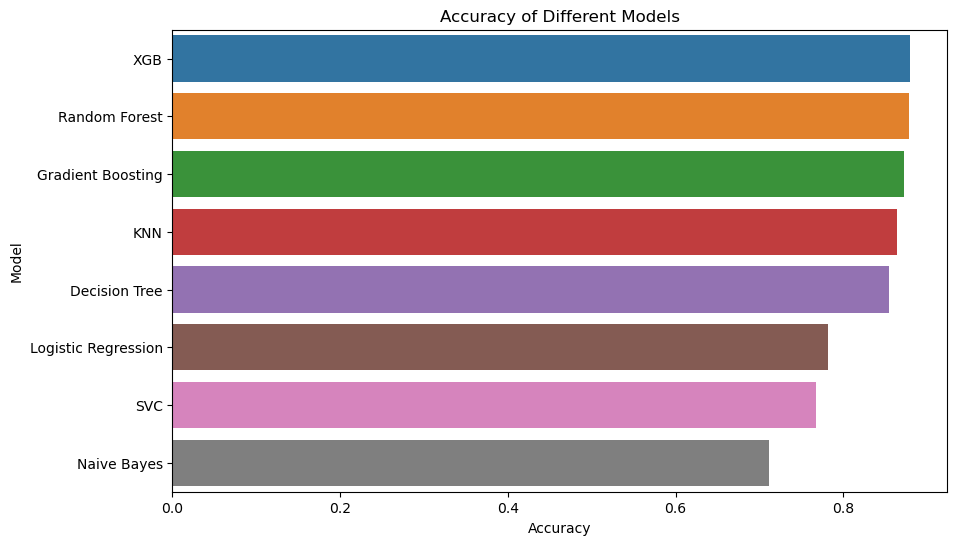

In [144]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=scores_df, order=df_sorted['Model'])
plt.title('Accuracy of Different Models')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

####  Another way Of Tuning

In [145]:
# metric = input("Choose the evaluation metric (accuracy, precision, recall, f1, mse): ")
# param_grid = {
#     "Decision Tree": {"max_depth": [1, 2, 3, 4, 5]},
#     "Random Forest": {"n_estimators": [50, 100, 150], "max_depth": [1, 2, 3, 4, 5]},
#     "Logistic Regression": {"C": [0.1, 1, 10]},
#     "Gradient Boosting": {"n_estimators": [50, 100, 150], "max_depth": [1, 2, 3, 4, 5]},
#     "KNN": {"n_neighbors": [3, 5, 7, 9]},
#     "Naive Bayes": {"alpha": [0.1, 1, 10]}
# }
# models = {
#     "Decision Tree": GridSearchCV(DecisionTreeClassifier(), param_grid["Decision Tree"], scoring=metric),
#     "Random Forest": RandomizedSearchCV(RandomForestClassifier(), param_grid["Random Forest"], scoring=metric, n_iter=10),
#     "Logistic Regression": GridSearchCV(LogisticRegression(), param_grid["Logistic Regression"], scoring=metric),
#     "Gradient Boosting": RandomizedSearchCV(GradientBoostingClassifier(), param_grid["Gradient Boosting"], scoring=metric, n_iter=10),
#     "KNN": GridSearchCV(KNeighborsClassifier(), param_grid["KNN"], scoring=metric),
#     "Naive Bayes": GridSearchCV(GaussianNB(), {}, scoring=metric)
# }

# for model_name,model in models.items():
#     model.fit(X_train, y_train)


# best_model = max(models, key=lambda x: models[x].best_score_)



# y_train_pred = models[best_model].predict(X_train)
# if metric == 'accuracy':
#     train_score = accuracy_score(y_train, y_train_pred)
# elif metric == 'precision':
#     train_score = precision_score(y_train, y_train_pred)
# elif metric == 'recall':
#     train_score = recall_score(y_train, y_train_pred)
# elif metric == 'f1':
#     train_score = f1_score(y_train, y_train_pred)
# elif metric == 'mse':
#     train_score = mean_squared_error(y_train, y_train_pred)


# y_pred = models[best_model].predict(X_test)

# if metric == 'accuracy':
#     score = accuracy_score(y_test, y_pred)
# elif metric == 'precision':
#     score = precision_score(y_test, y_pred)
# elif metric == 'recall':
#     score = recall_score(y_test, y_pred)
# elif metric == 'f1':
#     score = f1_score(y_test, y_pred)
# elif metric == 'mse':
#     score = mean_squared_error(y_test, y_pred)



# print("Best Model:", best_model)
# print("Best Model Hyperparameters:", models[best_model].best_params_)
# print(f"{metric.capitalize()} on Training Set:", train_score)
# print(f"{metric.capitalize()} on Test Set:", score)

### Convert Model for Deployment

In [146]:
import numpy as np
from flask import Flask, request, jsonify, render_template
import joblib
import os

In [147]:
import joblib
from sklearn.preprocessing import StandardScaler

# Assuming you have trained your XGB model and it's stored in 'xgb_c'
# Define the scaler
scaler = StandardScaler()
scaler.fit(X_train)  # Fit the scaler on your training data

# Save the best XGB model
joblib.dump(xgb_c, 'best_XGB_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully.")

Model and scaler saved successfully.


In [149]:
import pickle
# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [150]:
import joblib

model = joblib.load('best_XGB_model.pkl')

In [151]:
from joblib import dump, load

# Save the model
dump(model, 'best_XGB_model.joblib')


['best_XGB_model.joblib']

In [152]:
from joblib import dump, load

# Save the model
dump(scaler, 'scaler.joblib')


['scaler.joblib']

In [157]:
from joblib import load
import os

# Define paths to scaler and model files
path_to_scaler ='scaler.joblib'
path_to_model ='best_XGB_model.joblib'

try:
    if os.path.exists(path_to_scaler):
        scaler = load(path_to_scaler)
        print("Scaler loaded successfully!")
    else:
        raise FileNotFoundError(f"Scaler file not found at {path_to_scaler}")

    if os.path.exists(path_to_model):
        model = load(path_to_model)
        print("Model loaded successfully!")
    else:
        raise FileNotFoundError(f"Model file not found at {path_to_model}")

except Exception as e:
    print(f"Error loading scaler or model: {e}")


Scaler loaded successfully!
Model loaded successfully!
